In [1]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#%%time

# Load S&P 500 dataset over a 5 year period from Yahoo Finance
df = pd.read_csv('SP500.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000


## A. Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Date         1259 non-null object
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [4]:
# Check for NaN value

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### No NaN value was found in this dataset. 


#### Convert 'Date' to datetime object
#### Add day, month, year to the dataframe



In [5]:
df.Date = pd.to_datetime(df.Date) #convert 'date' to DateTime object
df['day'], df['month'], df['year'] = df.Date.dt.weekday_name, df.Date.dt.month, df.Date.dt.year
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014
5,2014-05-12,1880.030029,1897.130005,1880.030029,1896.650024,1896.650024,3005740000,Monday,5,2014
6,2014-05-13,1896.750000,1902.170044,1896.060059,1897.449951,1897.449951,2915680000,Tuesday,5,2014
7,2014-05-14,1897.130005,1897.130005,1885.770020,1888.530029,1888.530029,2822060000,Wednesday,5,2014
8,2014-05-15,1888.160034,1888.160034,1862.359985,1870.849976,1870.849976,3552640000,Thursday,5,2014
9,2014-05-16,1871.189941,1878.280029,1864.819946,1877.859985,1877.859985,3173650000,Friday,5,2014


#### Data Visualization

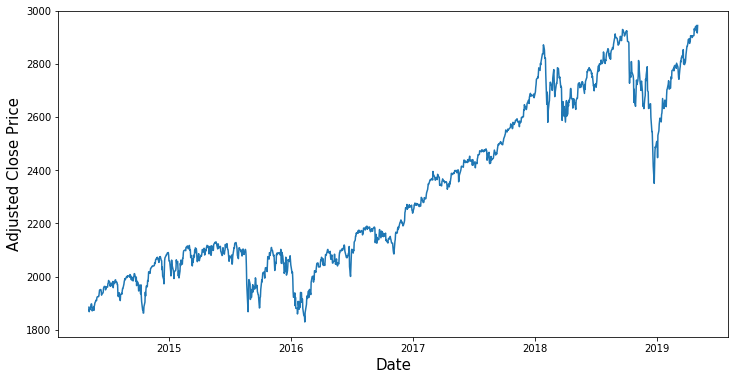

In [6]:
plt.figure(figsize=(12,6))

plt.plot(df['Date'],df['Adj Close'])

plt.ylabel('Adjusted Close Price', fontsize=15)
plt.xlabel('Date', fontsize=15)

plt.show()
plt.close()

## B. Apply Data Storytelling


### Question 1. Is there any effect of different times throughout the year on stock price? How do stock price & volume vary throughout a year?



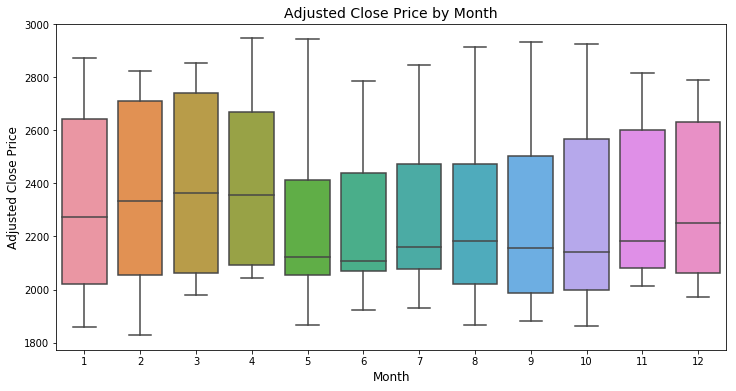

In [7]:
# Plot Adjusted Close Price by Month to detect Seasonality Effect

plt.figure(figsize=(12,6))
sns.boxplot(x = 'month', y = 'Adj Close', data = df)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Adjusted Close Price by Month', fontsize = 14)
plt.show()
plt.close()

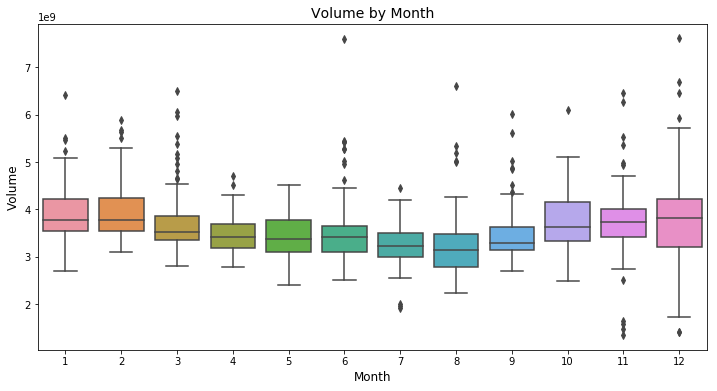

In [8]:
# Plot Volume by Month

plt.figure(figsize=(12,6))
sns.boxplot(x = 'month', y = 'Volume', data = df)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Volume by Month', fontsize = 14)
plt.show()
plt.close()

There are big changes in Price & Volume throughout a year. Let's look at some line plots to study the trend

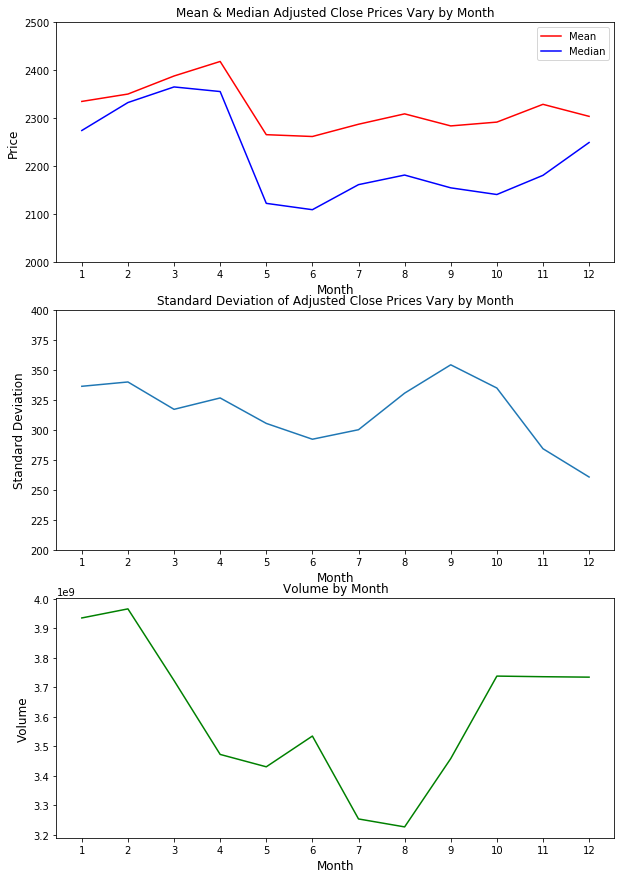

In [9]:
plt.figure(figsize=(10,15))

plt.figure(1)

# Plot Mean and Median by Month
plt.subplot(311)
plt.plot(df.groupby('month')[['Adj Close']].mean(),'red')
plt.plot(df.groupby('month')[['Adj Close']].median(),'blue')

plt.title('Mean & Median Adjusted Close Prices Vary by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.legend(['Mean','Median'])

#plt.axis([1, 12, 2000, 2500])
plt.xticks(np.arange(1, 12.1, 1.0))
plt.yticks(np.arange(2000,2600,100))

# Plot standard deviation by month
plt.subplot(312)
plt.plot(df.groupby('month')[['Adj Close']].std())

plt.title('Standard Deviation of Adjusted Close Prices Vary by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Standard Deviation',fontsize=12)

plt.xticks(np.arange(1, 12.1, 1.0))
plt.yticks(np.arange(200,420,25))


# Plot Volume by month
plt.subplot(313)
plt.plot(df.groupby('month')[['Volume']].mean(),'green')

plt.title('Volume by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Volume',fontsize=12)

plt.xticks(np.arange(1, 12.1, 1.0))

# Show the plots
plt.show()

#### Volume can also be plotted in a bar graph

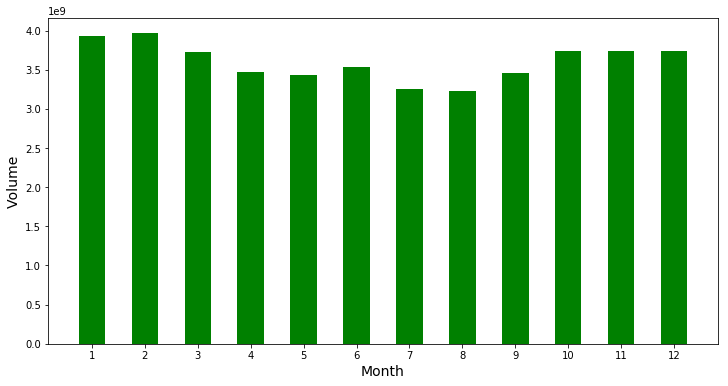

In [10]:
vol = df.groupby('month')[['Volume']].mean()

volbymonth = plt.figure(figsize=(12,6))

axis = volbymonth.add_subplot(1,1,1)
axis.bar(x=vol.index, height=vol.Volume, width = 0.5, color='green')

plt.ylabel('Volume',fontsize = 14)
plt.xlabel('Month',fontsize = 14)
plt.xticks(np.arange(1, 13, 1.0))

plt.show()


In [11]:
from scipy import stats
stats.pearsonr(df['Volume'],df['Adj Close'])

(-0.11034542244648882, 8.730196531925873e-05)

### Some insights:


* Price is highest in the first 4 months of a year.  It drops in summer, before increases again from October. 


* September is the time with highest standard deviation in stock prices. This could be due to the increase of volume , before price starts going up in October. Standard deviation starts going down from October, indicating market is getting more stable and has less fluctuation at that time.


* It is noticed that volume starts going down from March after staying high for the first 2 months, and this is followed by the drop of price in May. Volume increases rapidly in September and continues till end of the year, followed by increase of price from October. September is also the time that we observe maximum standard deviation, which could be due to this increase in volume that causes fluctuation in the market.


* These results seem to indicate that volume and price are well correlated with each other. However, Pearson Correlation Coefficient between Volume & Adjust Close Price indicates the 2 variables are reversely correlated. This could be explained as volume changes do not have immediate effects on price but a short time after that.
****



### Question 2. What is the effect of weekdays on stock price?

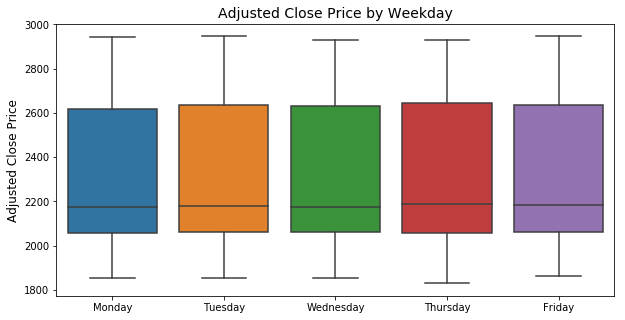

In [12]:
# Plot Adjusted Close Price vs. Weekdays

plt.figure(figsize=(10,5))
sns.boxplot(x = 'day', y = 'Adj Close', data = df)

plt.xlabel(None)
plt.ylabel('Adjusted Close Price', fontsize=12)

plt.title('Adjusted Close Price by Weekday', fontsize = 14)
plt.show()

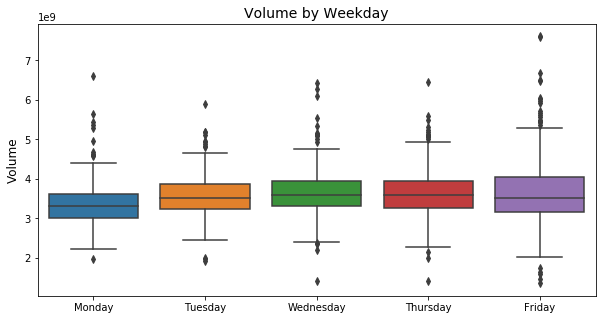

In [13]:
# Plot Volume vs. Weekdays

plt.figure(figsize=(10,5))
sns.boxplot(x = 'day', y = 'Volume', data = df)

plt.xlabel(None)
plt.ylabel('Volume', fontsize=12)

plt.title('Volume by Weekday', fontsize = 14)
plt.show()
plt.close()

#### There is not much difference in price throughout a week, however volume seems to increase from Monday to Friday. Let's look at some line plots to study the trend.

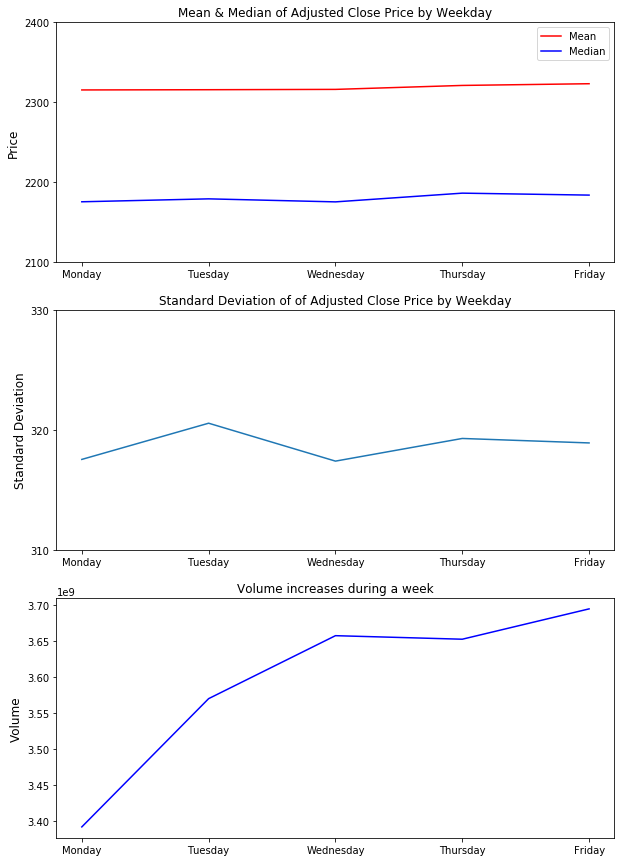

In [14]:
# Create a dictionary to map weekday

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sorterIndex = dict(zip(sorter,range(len(sorter))))


# Calculate mean, median, standard deviation and volume by weekday

mean_by_day = df.groupby('day')[['Adj Close']].mean()
median_by_day = df.groupby('day')[['Adj Close']].median()
std_by_day = df.groupby('day')[['Adj Close']].std()

vol_by_day = df.groupby('day')[['Volume']].mean()


# Mapping 

mean_by_day['Day_id'] = mean_by_day.index
mean_by_day['Day_id'] = mean_by_day['Day_id'].map(sorterIndex)
mean_by_day.sort_values('Day_id', inplace=True)

median_by_day['Day_id'] = median_by_day.index
median_by_day['Day_id'] = median_by_day['Day_id'].map(sorterIndex)
median_by_day.sort_values('Day_id', inplace=True)

std_by_day['Day_id'] = std_by_day.index
std_by_day['Day_id'] = std_by_day['Day_id'].map(sorterIndex)
std_by_day.sort_values('Day_id', inplace=True)

vol_by_day['Day_id'] = vol_by_day.index
vol_by_day['Day_id'] = vol_by_day['Day_id'].map(sorterIndex)
vol_by_day.sort_values('Day_id', inplace=True)


# Plotting
plt.figure(figsize=(10,15))

# Plot Mean and Median by Weekday
plt.subplot(311)
plt.plot(mean_by_day['Adj Close'],'red')
plt.plot(median_by_day['Adj Close'],'blue')

plt.title('Mean & Median of Adjusted Close Price by Weekday')
plt.ylabel('Price',fontsize=12)
plt.legend(['Mean','Median'])

plt.yticks(np.arange(2100,2401,100))


# Plot standard deviation by Weekday
plt.subplot(312)
plt.plot(std_by_day['Adj Close'])

plt.title('Standard Deviation of of Adjusted Close Price by Weekday')
plt.ylabel('Standard Deviation',fontsize=12)

plt.yticks(np.arange(310,340,10))


# Plot Volume by Weekday
plt.subplot(313)
plt.plot(vol_by_day['Volume'],'blue')

plt.title('Volume increases during a week')
plt.ylabel('Volume',fontsize=12)

# Show the plots
plt.show()

#### Volume can also be plotted in a bar graph

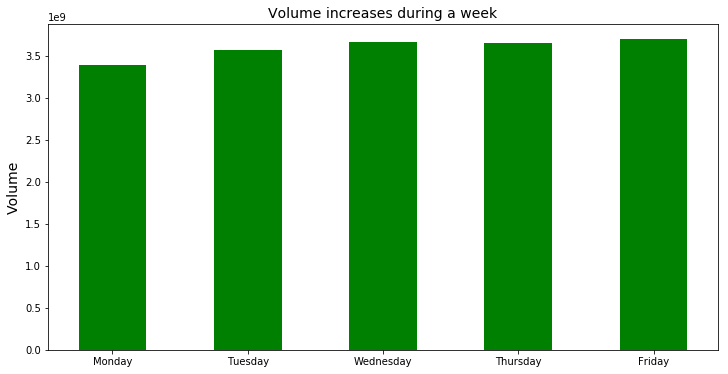

In [15]:
volbyday = plt.figure(figsize=(12,6))

axis = volbyday.add_subplot(1,1,1)
axis.bar(x=vol_by_day.index, height=vol_by_day.Volume, width = 0.5, color='green')

plt.title('Volume increases during a week',fontsize = 14)
plt.ylabel('Volume',fontsize = 14)

plt.show()



### Answer

* When averaging by weekday throughout a period of 5 years, there is no significant difference observed in prices between weekdays. This indicates that when price is in an increase or decrease cycle, it usually lasts for more than 1 week. Therefore, price averaging by weekday does not show significant difference here.

* Volume, however, shows significant change during a week. Volume is at its lowest on Monday, and keeps increasing until Friday. This represents the intensity in the market, low on Monday and high on Friday.

### This is end of chapter 7. Data Storytelling

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014


In [17]:
day1 = '2015-01-02'
temp = df[df.Date == day1]
temp

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
168,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,Friday,1,2015


In [18]:
len(df) - 30

1229

### Machine Learning Model

#### 1. Facebook Prophet

##### Pros:

- non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

0.25 10 0.9130350976256835 1.1576210294989333


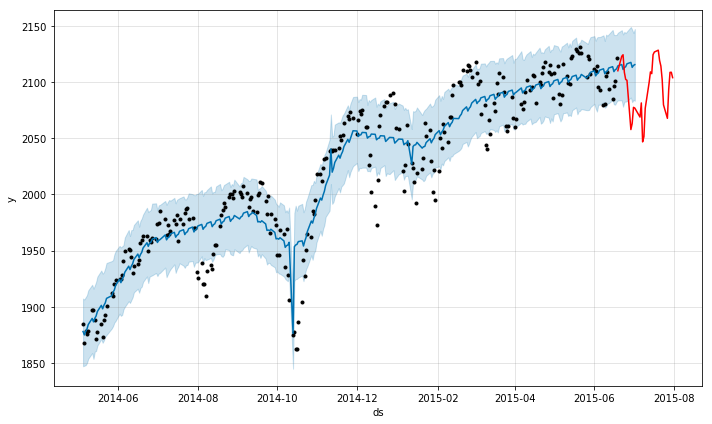

0.25 20 0.9130350976256835 1.3370134277428272


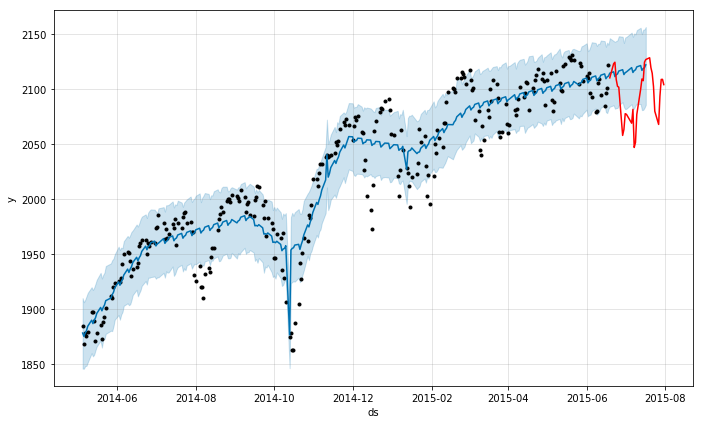

0.25 30 0.9130350976256835 1.2257704243156646


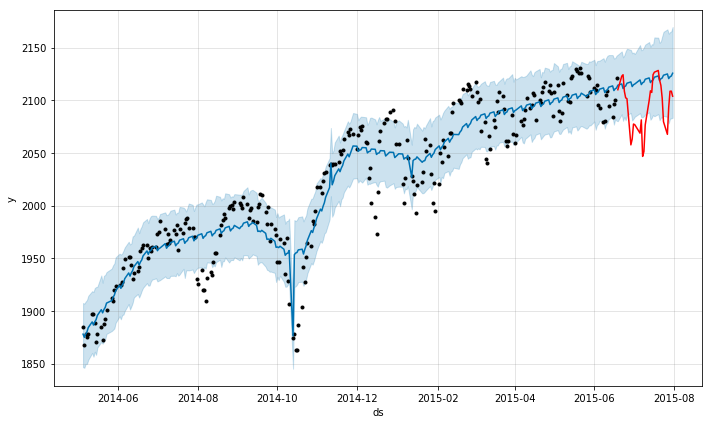

0.5 10 1.1741854267184448 0.613347233928962


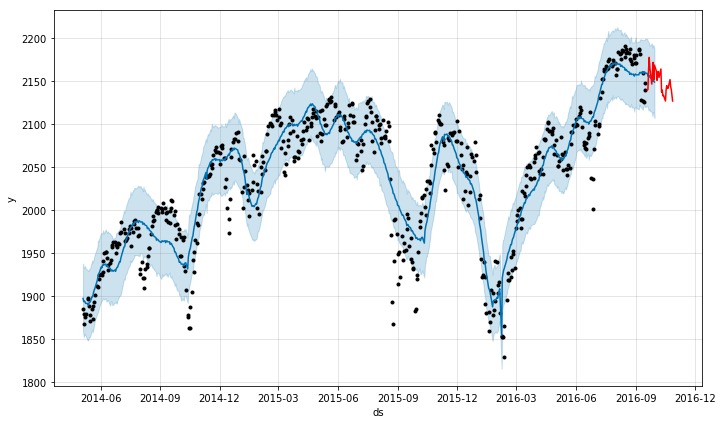

0.5 20 1.1741854267184448 0.7073732287176377


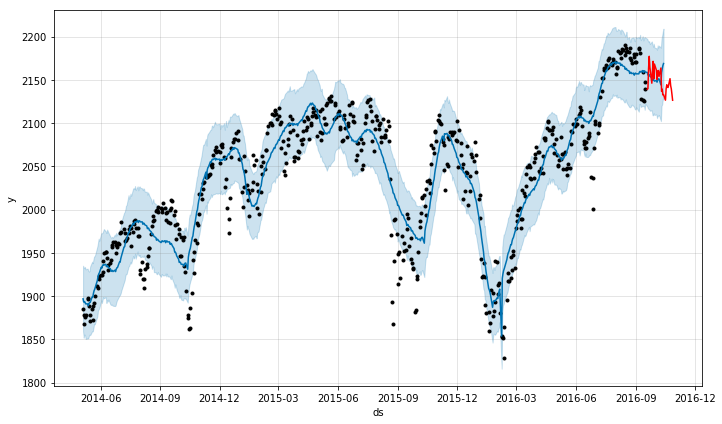

0.5 30 1.1741854267184448 1.5630488862286276


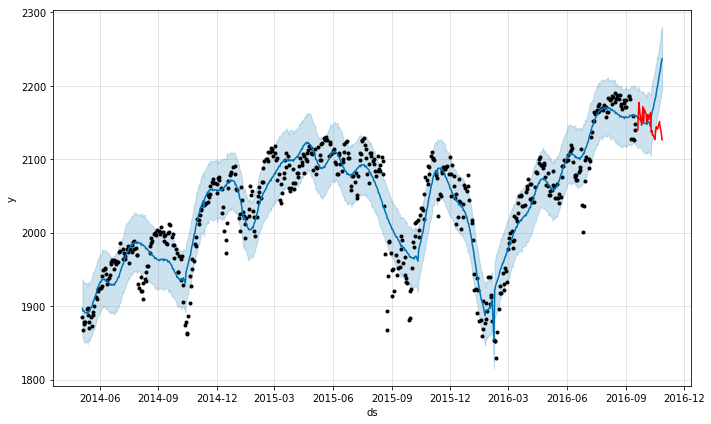

0.75 10 0.9924099908531316 0.8010012089201929


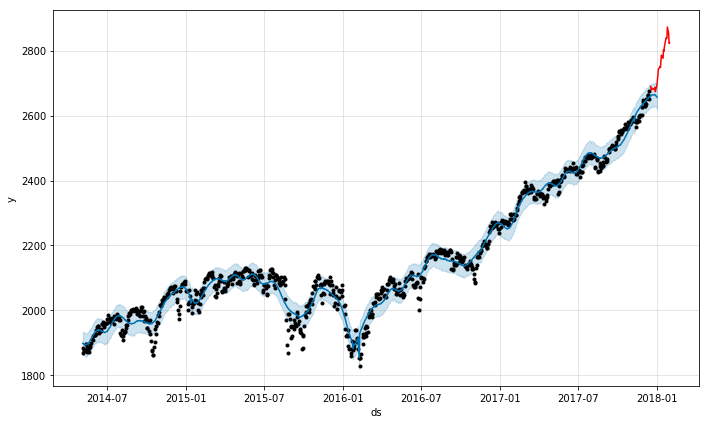

0.75 20 0.9924099908531316 2.447730527349328


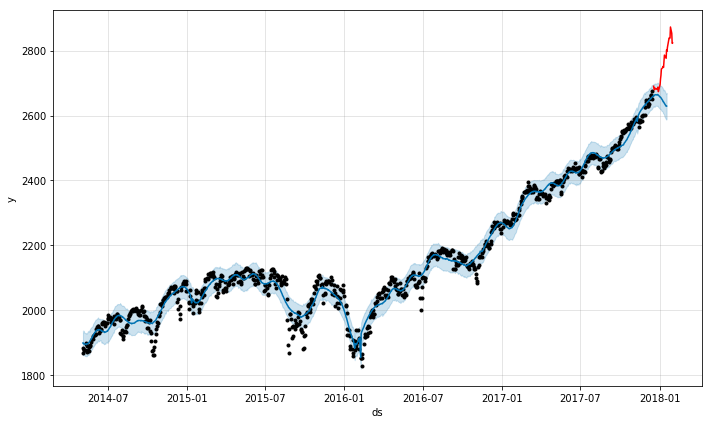

0.75 30 0.9924099908531316 4.03750282588906


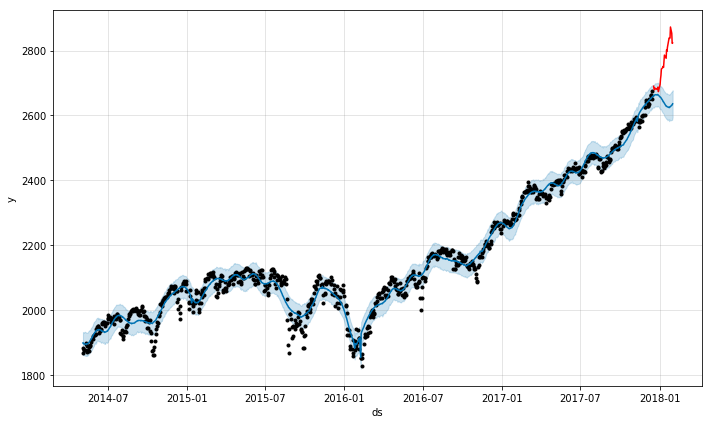

1.0 10 1.7194972186268822 4.271471580632374


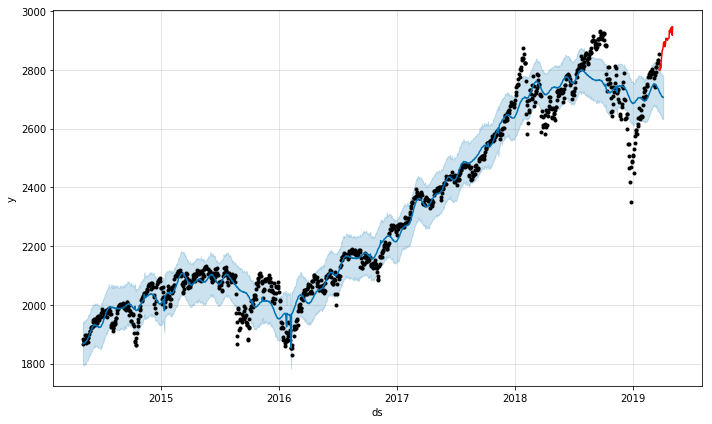

1.0 20 1.7194972186268822 5.331536958272496


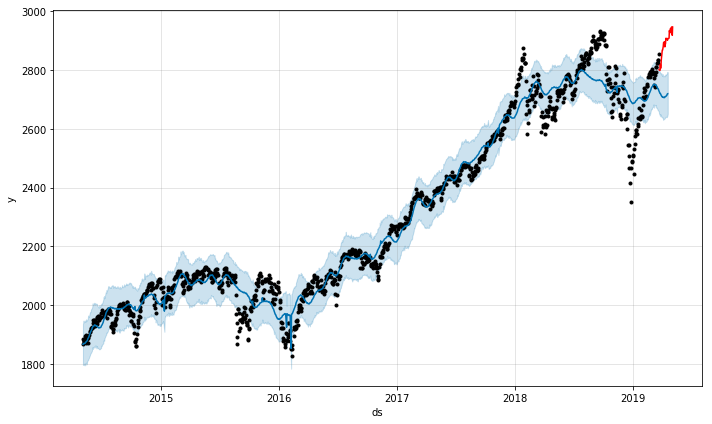

1.0 30 1.7194972186268822 5.843521551975627


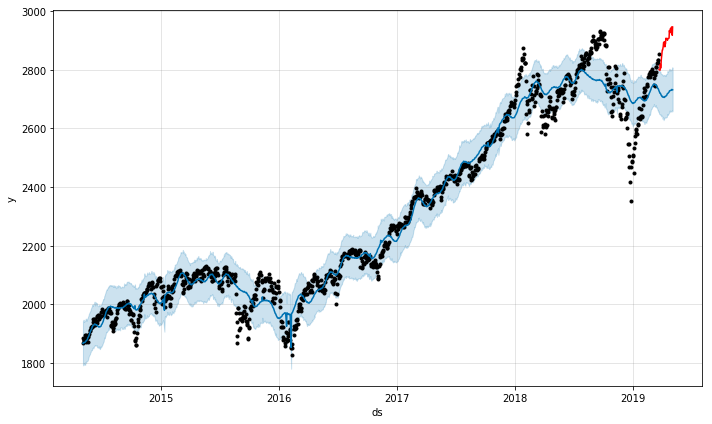

In [17]:
# Use out of box model to demonstrate prediction at different points in time
# with different prediction length

from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

# Create input dataframe
prophet_df = df[['Date', 'Adj Close']]

# Rename to ds and y
prophet_df.columns = ['ds', 'y']


# Create holidays & special events
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

# Prediction Size
H = [10, 20, 30]
Hmax = H[-1]

# Initiate min error
min_mape = 100.0

# End points of training set
div_ratio = [0.25, 0.5, 0.75, 1.0]

for div_point in div_ratio:
    for prediction_size in H:
        div = np.int(len(prophet_df)*div_point) #+ 1
        train_prophet = prophet_df[:(div - Hmax)]    # -prediction_size]
        train_end = len(train_prophet)
        test_end = train_end + prediction_size

        if test_end > len(prophet_df):
            print('test set out of boundary')
        
        default = Prophet(holidays = holidays)
        default.add_country_holidays(country_name='US')
        default.fit(train_prophet)
        future_def = default.make_future_dataframe(periods = prediction_size)
        future_def['ds'] = prophet_df['ds'][:len(future_def)] # do this to fix the 'ds' column in future dataframe
                        
        forecast_def = default.predict(future_def) # The predict method will assign each row in future a predicted value which it names yhat.

        train_error_def = 100*np.abs(forecast_def['yhat'][:train_end] - prophet_df['y'][:train_end])/prophet_df['y'][:train_end]
        test_error_def = 100*np.abs(forecast_def['yhat'][train_end:test_end] - prophet_df['y'][train_end:test_end])/prophet_df['y'][train_end:test_end]


        train_mape_def = train_error_def.mean()
        test_mape_def = test_error_def.mean()
        
        print(div_point, prediction_size, train_mape_def, test_mape_def)
        
        default.plot(forecast_def)
        plt.plot(prophet_df['ds'][train_end:div], prophet_df['y'][train_end:div], c='red')
        plt.show()

        
#                        if mape < min_mape:
#                            min_mape = mape
#                            min_i = i
#                            min_j = j
#                            min_k = k
#                            min_l = l
#                            min_m = m
                            
#print('Minimum value of Mean absolute percentage error (%) = ', min_mape)
#print(min_i, min_j, min_k, min_l, min_m)




In [18]:
# Here we demonstrate one case with hyperparameter tuning and see improvement in train & test error
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

# Create input dataframe
prophet_df = df[['Date', 'Adj Close']]

# Rename to ds and y
prophet_df.columns = ['ds', 'y']


# Create holidays & special events
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

# Initiate min error
min_mape = 100.0

# End points of training set
div_ratio = [1.0] # we target the last part in the graph, which is also the most difficult area to predict

# Prediction Size
H = [10, 20, 30]
Hmax = H[-1]

# Changepoints hyperparameters
changepoint_prior_scales = [0.05, 0.1, 0.3, 0.5] # default value is 0.05

# Seasonality parameters
yearly_seasonality_range = [5, 10, 15] # default value is 10

print('----Hyperparameters Tuning----')
print('Predic. Length --- Changepoint prior scale --- Yearly seasonality --- Train Error --- Test Error')

# Inititate empty list of error
train_err = []
test_err = []

for div_point in div_ratio:
    for prediction_size in H:
        div = np.int(len(prophet_df)*div_point) #+ 1
        train_prophet = prophet_df[:(div - Hmax)]    # -prediction_size]
        train_end = len(train_prophet)
        test_end = train_end + prediction_size

        if test_end > len(prophet_df):
            print('test set out of boundary')
        
        for i in changepoint_prior_scales:  # this was found to be VERY IMPORTANT! It helps predict the trend!    
            for j in yearly_seasonality_range:  # this is IMPORTANT!
                p = Prophet(changepoint_prior_scale=i, yearly_seasonality = j, holidays = holidays)
                p.add_country_holidays(country_name='US')

                # fit model
                p.fit(train_prophet)
                future = p.make_future_dataframe(periods = prediction_size)
                future['ds'] = prophet_df['ds'][:len(future)] # do this to fix the 'ds' column in future dataframe
                        
                # predict future values
                forecast = p.predict(future) # The predict method will assign each row in future a predicted value which it names yhat.
                                
                # Calculate train & test error
                train_error = 100*np.abs(forecast['yhat'][:train_end] - prophet_df['y'][:train_end])/prophet_df['y'][:train_end]
                test_error = 100*np.abs(forecast['yhat'][train_end:test_end] - prophet_df['y'][train_end:test_end])/prophet_df['y'][train_end:test_end]

                # Convert error to MAPE
                train_mape = train_error.mean()
                test_mape = test_error.mean()
        
                # Record the errors
                train_err.append(train_mape)
                test_err.append(test_mape)

                print(prediction_size, i, j, train_mape, test_mape)
        
#        default.plot(forecast_def)
#        plt.plot(prophet_df['ds'][train_end:div], prophet_df['y'][train_end:div], c='red')
#        plt.show()

        
#                        if mape < min_mape:
#                            min_mape = mape
#                            min_i = i
#                            min_j = j
#                            min_k = k
#                            min_l = l
#                            min_m = m
                            
#print('Minimum value of Mean absolute percentage error (%) = ', min_mape)
#print(min_i, min_j, min_k, min_l, min_m)

----Hyperparameters Tuning----
Predic. Length --- Changepoint prior scale --- Yearly seasonality --- Train Error --- Test Error
10 0.05 5 1.7041864133444296 4.028867990930721
10 0.05 10 1.7194972186268822 4.271471580632374
10 0.05 15 1.7120886240451179 4.565801274237719
10 0.1 5 1.2502388055396525 1.489478790473211
10 0.1 10 1.2375907731367903 1.5870156760525973
10 0.1 15 1.2213397221231788 1.7831508311873083
10 0.3 5 1.1429331267756762 0.8258620545750981
10 0.3 10 1.14476800830543 0.7867470461542396
10 0.3 15 1.1405499869738331 0.9492683173380054
10 0.5 5 1.1270469996103663 0.9542647582208357
10 0.5 10 1.1292338758120717 0.8653087410606561
10 0.5 15 1.1276261020093636 1.0110888665781397
20 0.05 5 1.7041864133444296 5.162149559834846
20 0.05 10 1.7194972186268822 5.331536958272496
20 0.05 15 1.7120886240451179 5.427282632462105
20 0.1 5 1.2502388055396525 2.2721415068368014
20 0.1 10 1.2375907731367903 2.2704561467927507
20 0.1 15 1.2213397221231788 2.305720359786386
20 0.3 5 1.1429331

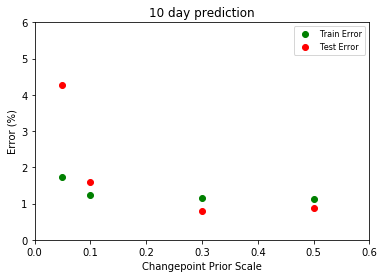

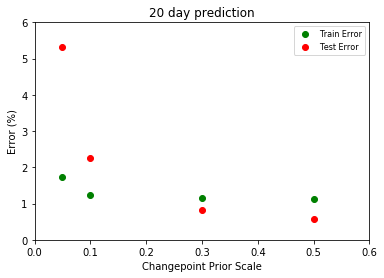

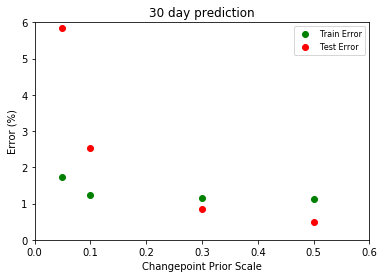

In [19]:
# 10 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[1], train_err[4], train_err[7], train_err[10]]
test_err_plot = [test_err[1], test_err[4], test_err[7], test_err[10]]

a = plt.scatter(x = changepoint_prior_scales, y = train_err_plot, c = 'green')
b = plt.scatter(x = changepoint_prior_scales, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('10 day prediction')
plt.xlabel('Changepoint Prior Scale')
plt.ylabel('Error (%)')
plt.xlim(0, 0.6)
plt.ylim(0, 6)
plt.show()

# 20 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[13], train_err[16], train_err[19], train_err[22]]
test_err_plot = [test_err[13], test_err[16], test_err[19], test_err[22]]

a = plt.scatter(x = changepoint_prior_scales, y = train_err_plot, c = 'green')
b = plt.scatter(x = changepoint_prior_scales, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('20 day prediction')
plt.xlabel('Changepoint Prior Scale')
plt.ylabel('Error (%)')
plt.xlim(0, 0.6)
plt.ylim(0, 6)
plt.show()


# 30 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[25], train_err[28], train_err[31], train_err[34]]
test_err_plot = [test_err[25], test_err[28], test_err[31], test_err[34]]

a = plt.scatter(x = changepoint_prior_scales, y = train_err_plot, c = 'green')
b = plt.scatter(x = changepoint_prior_scales, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('30 day prediction')
plt.xlabel('Changepoint Prior Scale')
plt.ylabel('Error (%)')
plt.xlim(0, 0.6)
plt.ylim(0, 6)
plt.show()

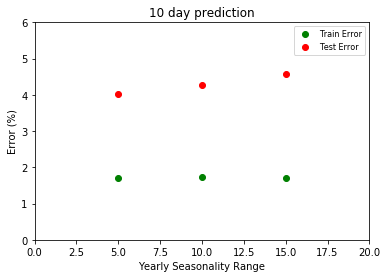

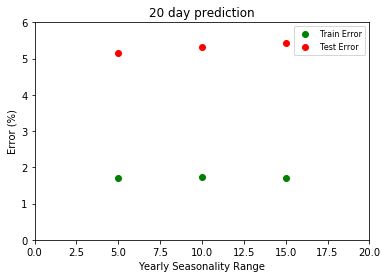

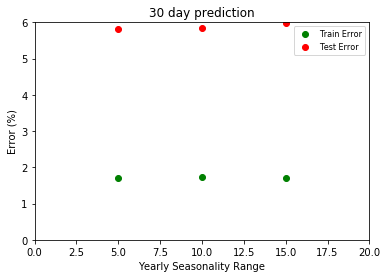

In [20]:
# 10 day prediction, vary yearly_seasonality only

train_err_plot = [train_err[0], train_err[1], train_err[2]]
test_err_plot = [test_err[0], test_err[1], test_err[2]]

a = plt.scatter(x = yearly_seasonality_range, y = train_err_plot, c = 'green')
b = plt.scatter(x = yearly_seasonality_range, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('10 day prediction')
plt.xlabel('Yearly Seasonality Range')
plt.ylabel('Error (%)')
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.show()

# 20 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[12], train_err[13], train_err[14]]
test_err_plot = [test_err[12], test_err[13], test_err[14]]

a = plt.scatter(x = yearly_seasonality_range, y = train_err_plot, c = 'green')
b = plt.scatter(x = yearly_seasonality_range, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('20 day prediction')
plt.xlabel('Yearly Seasonality Range')
plt.ylabel('Error (%)')
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.show()


# 30 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[24], train_err[25], train_err[26]]
test_err_plot = [test_err[24], test_err[25], test_err[26]]

a = plt.scatter(x = yearly_seasonality_range, y = train_err_plot, c = 'green')
b = plt.scatter(x = yearly_seasonality_range, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('30 day prediction')
plt.xlabel('Yearly Seasonality Range')
plt.ylabel('Error (%)')
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.show()

#### End of Prophet

#### 2. Extreme Gradient Boosting XGB

In [194]:
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [195]:
# Create input dataframe
df_xgb = df.copy()

# Add more features to df_xgb
df_xgb['dayofweek'] = df['Date'].dt.dayofweek
df_xgb['quarter'] = df['Date'].dt.quarter
df_xgb['dayofyear'] = df['Date'].dt.dayofyear
df_xgb['dayofmonth'] = df['Date'].dt.day
df_xgb['weekofyear'] = df['Date'].dt.weekofyear
df_xgb['day_no']=[i+1 for i in range(len(df_xgb))]
df_xgb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,day_no
1254,2019-04-29,2940.580078,2949.520020,2939.350098,2943.030029,2943.030029,3118780000,Monday,4,2019,0,2,119,29,18,1255
1255,2019-04-30,2937.139893,2948.219971,2924.110107,2945.830078,2945.830078,3919330000,Tuesday,4,2019,1,2,120,30,18,1256
1256,2019-05-01,2952.330078,2954.129883,2923.360107,2923.729980,2923.729980,3645850000,Wednesday,5,2019,2,2,121,1,18,1257
1257,2019-05-02,2922.159912,2931.679932,2900.500000,2917.520020,2917.520020,3778890000,Thursday,5,2019,3,2,122,2,18,1258
1258,2019-05-03,2929.209961,2947.850098,2929.209961,2945.639893,2945.639893,3338120000,Friday,5,2019,4,2,123,3,18,1259


#### Data Preparation, Model Train & Fit

1229
30


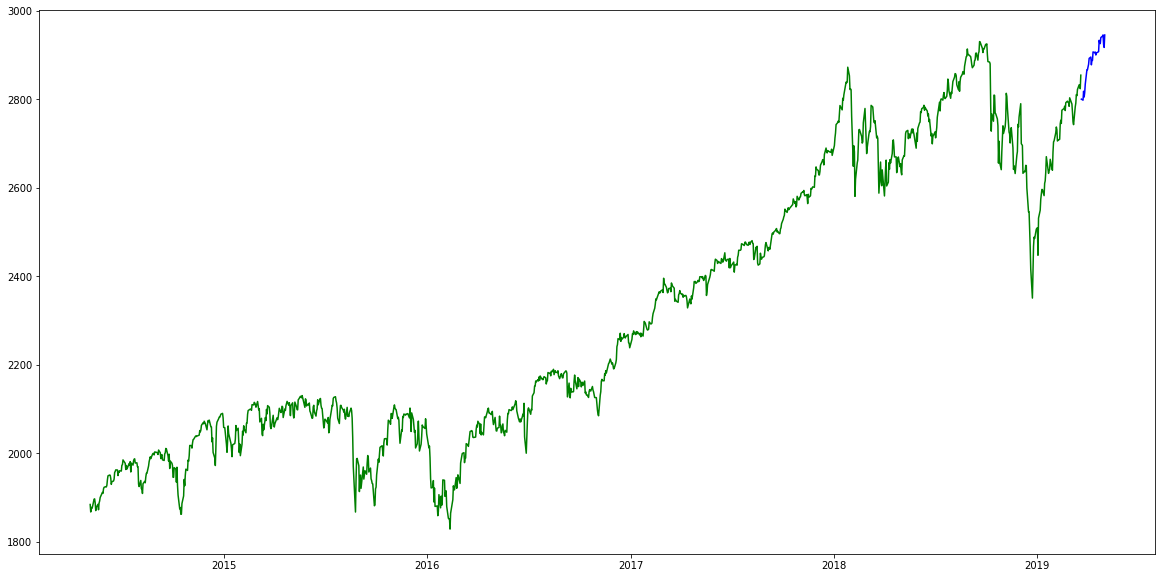

In [170]:
# Split df_xgb into train and test sets
test_size = 30
train_end = len(df_xgb) - test_size

df_xgb_train = df_xgb[:train_end]
df_xgb_test = df_xgb[train_end:]

print(len(df_xgb_train))
print(len(df_xgb_test))

plt.figure(figsize=(20,10))
plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c= 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
plt.show()

# Create rolling average features in the training set, using data points from training only
df_xgb_train['roll_average_5'] = df_xgb_train['Adj Close'].shift(1).rolling(5).mean()
df_xgb_train['roll_average_10'] = df_xgb_train['Adj Close'].shift(1).rolling(10).mean()
df_xgb_train['roll_average_15'] = df_xgb_train['Adj Close'].shift(1).rolling(15).mean()
df_xgb_train['roll_average_20'] = df_xgb_train['Adj Close'].shift(1).rolling(20).mean()

#df_xgb_train['roll_min_5'] = df_xgb_train['Adj Close'].shift(1).rolling(5).min()
#df_xgb_train['roll_min_10'] = df_xgb_train['Adj Close'].shift(1).rolling(10).min()
#df_xgb_train['roll_min_15'] = df_xgb_train['Adj Close'].shift(1).rolling(15).min()
#df_xgb_train['roll_min_20'] = df_xgb_train['Adj Close'].shift(1).rolling(20).min()

#df_xgb_train['roll_max_5'] = df_xgb_train['Adj Close'].shift(1).rolling(5).max()
#df_xgb_train['roll_max_10'] = df_xgb_train['Adj Close'].shift(1).rolling(10).max()
#df_xgb_train['roll_max_15'] = df_xgb_train['Adj Close'].shift(1).rolling(15).max()
#df_xgb_train['roll_max_20'] = df_xgb_train['Adj Close'].shift(1).rolling(20).max()

df_xgb_train['roll_median_5'] = df_xgb_train['Adj Close'].shift(1).rolling(5).median()
df_xgb_train['roll_median_10'] = df_xgb_train['Adj Close'].shift(1).rolling(10).median()
df_xgb_train['roll_median_15'] = df_xgb_train['Adj Close'].shift(1).rolling(15).median()
df_xgb_train['roll_median_20'] = df_xgb_train['Adj Close'].shift(1).rolling(20).median()


# Create rolling average features in the test set, using last data points in the training set.
# No data from test set was used here.

ra_vals = [5, 10, 15, 20]

for k in ra_vals:
    # Create rolling mean
    list_mean = df_xgb_train['Adj Close'][-k:].tolist()
    
    for i in range(len(df_xgb_test)):
        temp_mean = np.mean(list_mean[-k:])
        list_mean.append(temp_mean)

    list_mean_trim = [list_mean[i] for i in range(k,len(list_mean))]
    
    if k == 5:
        list_ave5 = list_mean_trim
    elif k == 10:
        list_ave10 = list_mean_trim
    elif k == 15:
        list_ave15 = list_mean_trim
    else:
        list_ave20 = list_mean_trim
    # =============================

    # Create rolling median
    list_median = df_xgb_train['Adj Close'][-k:].tolist()
    
    for i in range(len(df_xgb_test)):
        temp_median = np.median(list_median[-k:])
        list_median.append(temp_median)

    list_median_trim = [list_median[i] for i in range(k,len(list_median))]
    
    if k == 5:
        list_med5 = list_median_trim
    elif k == 10:
        list_med10 = list_median_trim
    elif k == 15:
        list_med15 = list_median_trim
    else:
        list_med20 = list_median_trim
    # =============================
    
        
    # Create rolling min
    list_min = df_xgb_train['Adj Close'][-k:].tolist()
    
    for i in range(len(df_xgb_test)):
        temp_min = np.min(list_min[-k:])
        list_min.append(temp_min)

    list_min_trim = [list_min[i] for i in range(k,len(list_min))]
    
    if k == 5:
        list_min5 = list_min_trim
    elif k == 10:
        list_min10 = list_min_trim
    elif k == 15:
        list_min15 = list_min_trim
    else:
        list_min20 = list_min_trim
    # =============================
    

    # Create rolling max
    list_max = df_xgb_train['Adj Close'][-k:].tolist()
    
    for i in range(len(df_xgb_test)):
        temp_max = np.max(list_max[-k:])
        list_max.append(temp_max)

    list_max_trim = [list_max[i] for i in range(k,len(list_max))]
    
    if k == 5:
        list_max5 = list_max_trim
    elif k == 10:
        list_max10 = list_max_trim
    elif k == 15:
        list_max15 = list_max_trim
    else:
        list_max20 = list_max_trim
    # =============================

      
df_xgb_test['roll_average_5']=[list_ave5[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_average_10']=[list_ave10[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_average_15']=[list_ave15[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_average_20']=[list_ave20[i] for i in range(len(df_xgb_test))]

    
#df_xgb_test['roll_min_5']=[list_min5[i] for i in range(len(df_xgb_test))]
#df_xgb_test['roll_min_10']=[list_min10[i] for i in range(len(df_xgb_test))]
#df_xgb_test['roll_min_15']=[list_min15[i] for i in range(len(df_xgb_test))]
#df_xgb_test['roll_min_20']=[list_min20[i] for i in range(len(df_xgb_test))]

#df_xgb_test['roll_max_5']=[list_max5[i] for i in range(len(df_xgb_test))]
#df_xgb_test['roll_max_10']=[list_max10[i] for i in range(len(df_xgb_test))]
#df_xgb_test['roll_max_15']=[list_max15[i] for i in range(len(df_xgb_test))]
#df_xgb_test['roll_max_20']=[list_max20[i] for i in range(len(df_xgb_test))]

df_xgb_test['roll_median_5']=[list_med5[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_median_10']=[list_med10[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_median_15']=[list_med15[i] for i in range(len(df_xgb_test))]
df_xgb_test['roll_median_20']=[list_med20[i] for i in range(len(df_xgb_test))]


# Now add mean price on different frequency to training and test set to create more features.
# Again, using data from training set only!
daily_mean_enc = df_xgb_train.groupby('day')['Adj Close'].mean().reset_index()
daily_mean_enc.columns = ['day','daily_mean']

weekly_mean_enc = df_xgb_train.groupby('weekofyear')['Adj Close'].mean().reset_index()
weekly_mean_enc.columns = ['weekofyear','weekly_mean']

monthly_mean_enc = df_xgb_train.groupby('month')['Adj Close'].mean().reset_index()
monthly_mean_enc.columns = ['month','monthly_mean']

yearly_mean_enc = df_xgb_train.groupby('year')['Adj Close'].mean().reset_index()
yearly_mean_enc.columns = ['year','yearly_mean']

# Join the encodes to training set
df_xgb_train = pd.merge(df_xgb_train,daily_mean_enc,how='left',on=['day'])
df_xgb_train = pd.merge(df_xgb_train,weekly_mean_enc,how='left',on=['weekofyear'])
df_xgb_train = pd.merge(df_xgb_train,monthly_mean_enc,how='left',on=['month'])
df_xgb_train = pd.merge(df_xgb_train,yearly_mean_enc,how='left',on=['year'])


# Join the encodes to test set
df_xgb_test = pd.merge(df_xgb_test,daily_mean_enc,how='left',on=['day'])
df_xgb_test = pd.merge(df_xgb_test,weekly_mean_enc,how='left',on=['weekofyear'])
df_xgb_test = pd.merge(df_xgb_test,monthly_mean_enc,how='left',on=['month'])
df_xgb_test = pd.merge(df_xgb_test,yearly_mean_enc,how='left',on=['year'])


# Remove the first 29 lines in training set
x_train_xgb = df_xgb_train.iloc[29:].drop(columns=['Adj Close', 'Date','Volume','day','Open', 'High', 'Low', 'Close'])
y_train_xgb = df_xgb_train.iloc[29:]['Adj Close']

x_test_xgb = df_xgb_test.drop(columns=['Adj Close','Date','Volume','day','Open', 'High', 'Low', 'Close'])
y_test_xgb = df_xgb_test['Adj Close']

In [196]:
df_xgb_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,...,roll_average_15,roll_average_20,roll_median_5,roll_median_10,roll_median_15,roll_median_20,daily_mean,weekly_mean,monthly_mean,yearly_mean
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,2300.616387,2226.622368,2246.790282,1975.388628
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,2302.082854,2226.622368,2246.790282,1975.388628
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,2302.679645,2226.622368,2246.790282,1975.388628
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,2307.422862,2226.622368,2246.790282,1975.388628
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,2309.542566,2226.622368,2246.790282,1975.388628


In [171]:
print(x_train_xgb.columns)

Index(['month', 'year', 'dayofweek', 'quarter', 'dayofyear', 'dayofmonth',
       'weekofyear', 'day_no', 'roll_average_5', 'roll_average_10',
       'roll_average_15', 'roll_average_20', 'roll_median_5', 'roll_median_10',
       'roll_median_15', 'roll_median_20', 'daily_mean', 'weekly_mean',
       'monthly_mean', 'yearly_mean'],
      dtype='object')


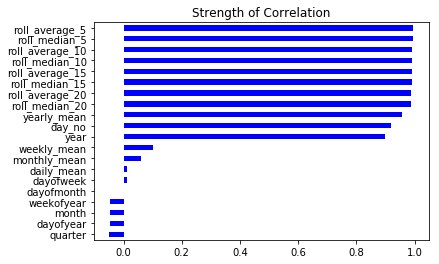

In [172]:
corr = x_train_xgb.corrwith(y_train_xgb)
corr.sort_values().plot.barh(color = 'blue', title = 'Strength of Correlation')

### Hyperparameters Tuning

In [176]:
# Performance error
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#    return np.mean(np.abs((y_true - y_pred) ))

In [177]:
# Cross validation setup
n_fold = 5
fold_size = len(x_train_xgb)/n_fold
holdout_size = test_size # see note for explanation of this number
fold_no = [x+1 for x in list(range(n_fold))]

best_n_estimators =  100 1.2018834648244472


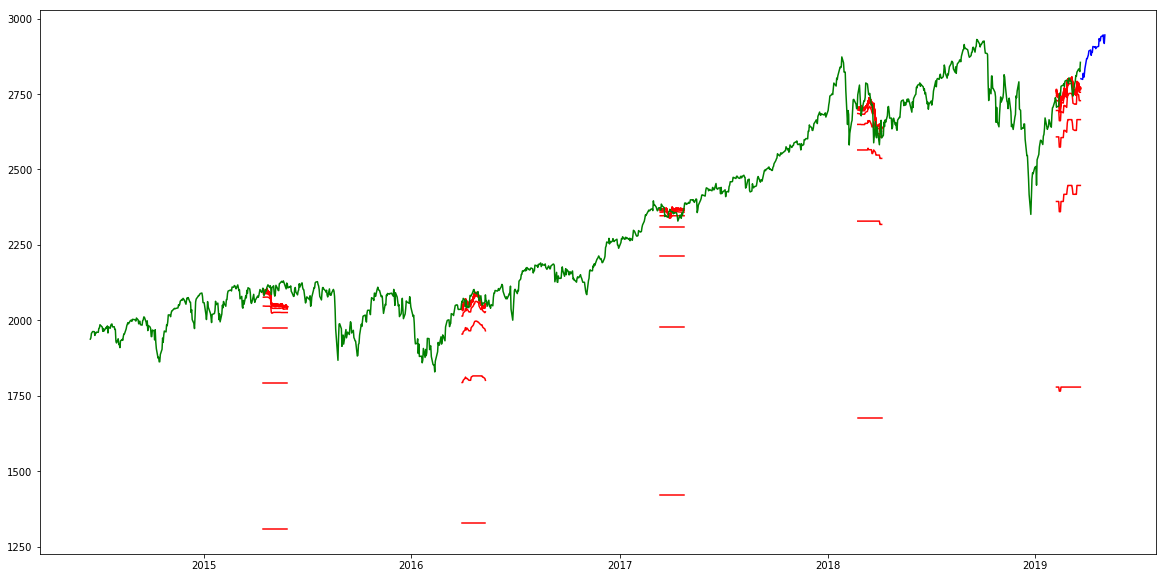

In [181]:
plt.figure(figsize=(20,10))

min_mape = 100 # Initiate mape

for N in range(10, 201, 10): # fit learning_rate = 0.1, find n_estimators
    # Create XGBRegressor
    reg = xgb.XGBRegressor(max_depth = 5, min_child_weight = 1, gamma = 0, subsample=0.8, colsample_bytree = 0.8, learning_rate = 0.1, n_estimators = N)


#    plt.figure(figsize=(20,10))
#    plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c = 'green')

    
    # Cross validation
    mape_cv = 0.
    for p in fold_no:
        fold_end = np.int(fold_size*p)
        reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
#            eval_set=[(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)], y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)])],
#            early_stopping_rounds=50,
            verbose=False) # Change verbose to True if you want to see it train

#        Use this line to plot prediction on each fold in cross validation
        plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
        mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
    mape_cv = mape_cv/n_fold
    
    if mape_cv < min_mape:
        min_mape = mape_cv
        best_n_estimators = N
        
#    print('cross validation error = ', mape_cv, 'n_estimators = ', N)
    
print('best_n_estimators = ', best_n_estimators, min_mape)

# Plot for visualization
plt.plot(df_xgb_train['Date'][29:], df_xgb_train['Adj Close'][29:], c= 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
plt.show()

In [182]:
min_mape = 100 # Initiate mape

max_depth_vals = range(10,15,1)
min_child_weight_vals = range(1,7,1)

for md in max_depth_vals: # Find optimum values of max_depth and min_child_weight
    for mcw in min_child_weight_vals:
        # Create XGBRegressor
        reg = xgb.XGBRegressor(max_depth = md, min_child_weight = mcw, gamma = 0, subsample=0.8, colsample_bytree = 0.8, learning_rate = 0.1, n_estimators = best_n_estimators)


#    plt.figure(figsize=(20,10))
#    plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c = 'green')

    
        # Cross validation
        mape_cv = 0.
        for p in fold_no:
            fold_end = np.int(fold_size*p)
            reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
#                eval_set=[(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)], y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)])],
#                early_stopping_rounds=50,
                verbose=False) # Change verbose to True if you want to see it train

#        Use this line to plot prediction on each fold in cross validation
#            plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
            mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
        mape_cv = mape_cv/n_fold


        if mape_cv < min_mape:
            min_mape = mape_cv
            best_max_depth = md
            best_min_child_weight = mcw
        
#        print('cross validation error = ', mape_cv, '; max_depth = ', md, '; mcw = ', mcw)
    
print('==============================')
print('best_max_depth = ', best_max_depth)
print('best_min_child_weight = ', best_min_child_weight)
print('lowest mape = ', min_mape)

best_max_depth =  11
best_min_child_weight =  4
lowest mape =  1.1112466369027547


In [183]:
min_mape = 100 # Initiate mape

gamma_vals = [i/10.0 for i in range(0,8)]

for gam in gamma_vals:
    # Create XGBRegressor
    reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight, gamma = gam, subsample=0.8, colsample_bytree = 0.8, learning_rate = 0.1, n_estimators = best_n_estimators)


#    plt.figure(figsize=(20,10))
#    plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c = 'green')

    
     # Cross validation
    mape_cv = 0.
    for p in fold_no:
        fold_end = np.int(fold_size*p)
        reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
#            eval_set=[(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)], y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)])],
#            early_stopping_rounds=50,
            verbose=False) # Change verbose to True if you want to see it train

#        Use this line to plot prediction on each fold in cross validation
#            plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
        mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
    mape_cv = mape_cv/n_fold

    if mape_cv < min_mape:
        min_mape = mape_cv
        best_gamma = gam
         
#    print('cross validation error = ', mape_cv, '; gamma =', gam)
    
print('==============================')
print('best_gamma = ', best_gamma)
print('lowest mape = ', min_mape)

best_gamma =  0.4
lowest mape =  1.1015579573616237


best_n_estimators =  100 1.1015579573616237


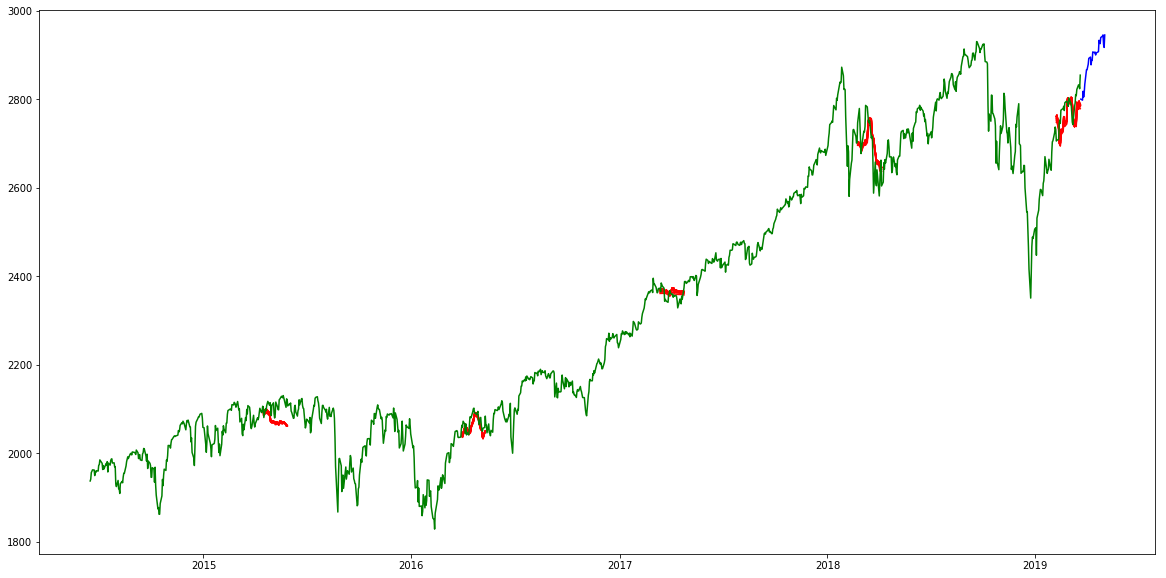

In [184]:
plt.figure(figsize = (20,10))

min_mape = 100 # Initiate mape

for N in range(60, 111, 5): # fit learning_rate = 0.1, find n_estimators
    # Create XGBRegressor
    reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight, gamma = best_gamma, subsample=0.8, colsample_bytree = 0.8, learning_rate = 0.1, n_estimators = N)
    
     # Cross validation
    mape_cv = 0.
    for p in fold_no:
        fold_end = np.int(fold_size*p)
        reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
#            eval_set=[(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)], y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)])],
#            early_stopping_rounds=50,
            verbose=False) # Change verbose to True if you want to see it train

#        Use this line to plot prediction on each fold in cross validation
        plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
        mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
    mape_cv = mape_cv/n_fold
    
    if mape_cv < min_mape:
        min_mape = mape_cv
        best_n_estimators = N
        
#    print('cross validation error = ', mape_cv, 'n_estimators = ', N)
    
print('best_n_estimators = ', best_n_estimators, min_mape)

# Plot for visualization
plt.plot(df_xgb_train['Date'][29:], df_xgb_train['Adj Close'][29:], c= 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
plt.show()

In [185]:
min_mape = 100 # Initiate mape

subsample_vals = [i/100.0 for i in range(60,100,5)]
colsample_bytree_vals = [i/100.0 for i in range(60,100,5)]

for subs in subsample_vals: # Find optimum values of max_depth and min_child_weight
    for cols in colsample_bytree_vals:
        # Create XGBRegressor
        reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight,
                               gamma = best_gamma, subsample=subs, colsample_bytree = cols, 
                               learning_rate = 0.1, n_estimators = best_n_estimators)


#    plt.figure(figsize=(20,10))
#    plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c = 'green')

    
        # Cross validation
        mape_cv = 0.
        for p in fold_no:
            fold_end = np.int(fold_size*p)
            reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
#                eval_set=[(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)], y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)])],
#                early_stopping_rounds=50,
                verbose=False) # Change verbose to True if you want to see it train

#        Use this line to plot prediction on each fold in cross validation
#            plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
            mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
        mape_cv = mape_cv/n_fold


        if mape_cv < min_mape:
            min_mape = mape_cv
            best_subsample = subs
            best_colsample_bytree = cols
        
#        print('cross validation error = ', mape_cv, '; subsample = ', subs, '; colsample_bytree = ', cols)
    
print('==============================')
print('best_subsample = ', best_subsample)
print('best_colsample_bytree = ', best_colsample_bytree)
print('lowest mape = ', min_mape)

best_subsample =  0.9
best_colsample_bytree =  0.9
lowest mape =  1.0847540362724786


best_n_estimators =  100 1.0847540362724786


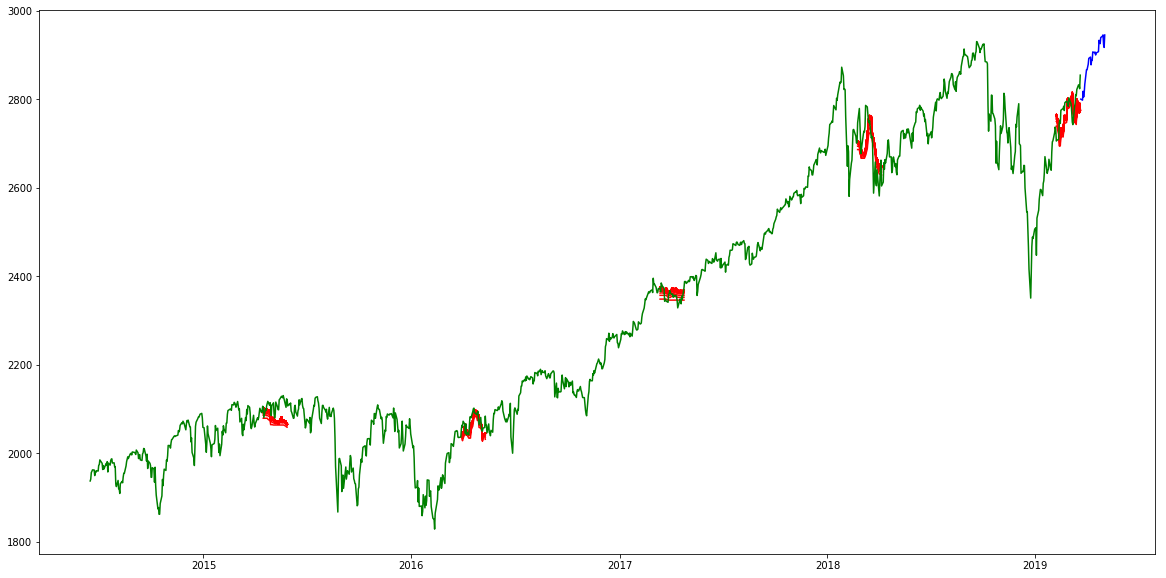

In [189]:
plt.figure(figsize=(20,10))

min_mape = 100 # Initiate mape

for N in range(50, 301, 5): # fit learning_rate = 0.1, find n_estimators
    # Create XGBRegressor
    reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight,gamma = best_gamma, 
                           subsample=best_subsample, colsample_bytree = best_colsample_bytree, 
                           learning_rate = 0.1, n_estimators = N)

    
    # Cross validation
    mape_cv = 0.
    for p in fold_no:
        fold_end = np.int(fold_size*p)
        reg.fit(x_train_xgb.iloc[:(fold_end-holdout_size)], y_train_xgb.iloc[:(fold_end-holdout_size)],
#            eval_set=[(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)], y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)])],
#            early_stopping_rounds=50,
            verbose=False) # Change verbose to True if you want to see it train

#        Use this line to plot prediction on each fold in cross validation
        plt.plot(df_xgb_train['Date'][(29+fold_end-holdout_size):(29+fold_end)], reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]), c='red')
        
        mape_cv += mean_absolute_percentage_error(y_true = y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)],
                                              y_pred = reg.predict(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)]))
    mape_cv = mape_cv/n_fold
    
    if mape_cv < min_mape:
        min_mape = mape_cv
        best_n_estimators = N
        
#    print('cross validation error = ', mape_cv, 'n_estimators = ', N)
    
print('best_n_estimators = ', best_n_estimators, min_mape)

# Plot for visualization
plt.plot(df_xgb_train['Date'][29:], df_xgb_train['Adj Close'][29:], c= 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
plt.show()

### Done with hyperparameters tuning. Now predict target values in test set


=== Train Error ===
0.17945311099020095

=== Test Error ===
1.9573520454700268


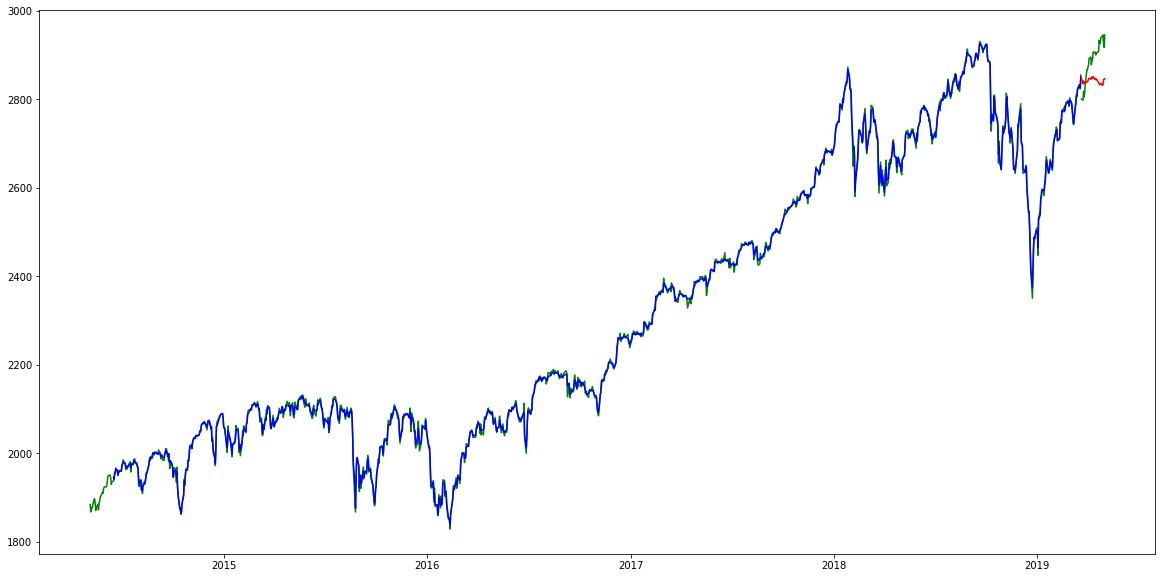

In [192]:
reg = xgb.XGBRegressor(max_depth = best_max_depth, min_child_weight = best_min_child_weight, gamma = best_gamma, 
                       subsample=best_subsample, colsample_bytree = best_colsample_bytree, 
                       learning_rate = 0.1, n_estimators = best_n_estimators) #best_n_estimators)

# Fit model to training data
reg.fit(x_train_xgb, y_train_xgb,
#        eval_set=[(x_test_xgb, y_test_xgb)],
#        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

#reg.fit(x_train_xgb.iloc[:(fold_size*fold_no[-1]-holdout_size)], y_train_xgb.iloc[:(fold_size*fold_no[-1]-holdout_size)],
#            eval_set=[(x_train_xgb.iloc[(fold_end-holdout_size):(fold_end)], y_train_xgb.iloc[(fold_end-holdout_size):(fold_end)])],
#            early_stopping_rounds=50,
#        verbose=False) # Change verbose to True if you want to see it train



# Predict target variables in train & test set
#df_xgb_train['Predicted Price'][29:] = reg.predict(x_train_xgb)
predicted_train = reg.predict(x_train_xgb)
predicted_test = reg.predict(x_test_xgb)




print('')
print('=== Train Error ===')
print(mean_absolute_percentage_error(y_true=y_train_xgb,
                   y_pred=predicted_train))
print('')
print('=== Test Error ===')
print(mean_absolute_percentage_error(y_true=y_test_xgb,
                   y_pred=predicted_test))


plt.figure(figsize=(20,10))

plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c = 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c = 'green')
plt.plot(df_xgb_train['Date'][29:train_end], predicted_train, c = 'blue')
plt.plot(df_xgb_test['Date'], predicted_test, c = 'red')


plt.show()

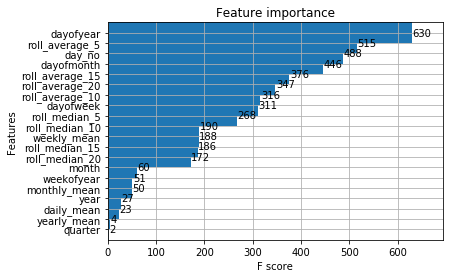

In [193]:
_ = plot_importance(reg, height=2)

In [58]:
type(x_test_xgb)#.head()

pandas.core.frame.DataFrame

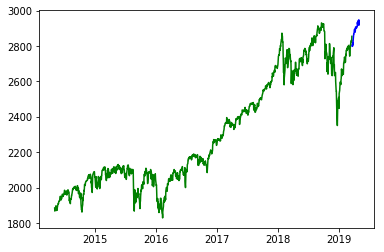


=== Train Error ===
0.3475042198281512

=== Test Error ===
2.441008806869523


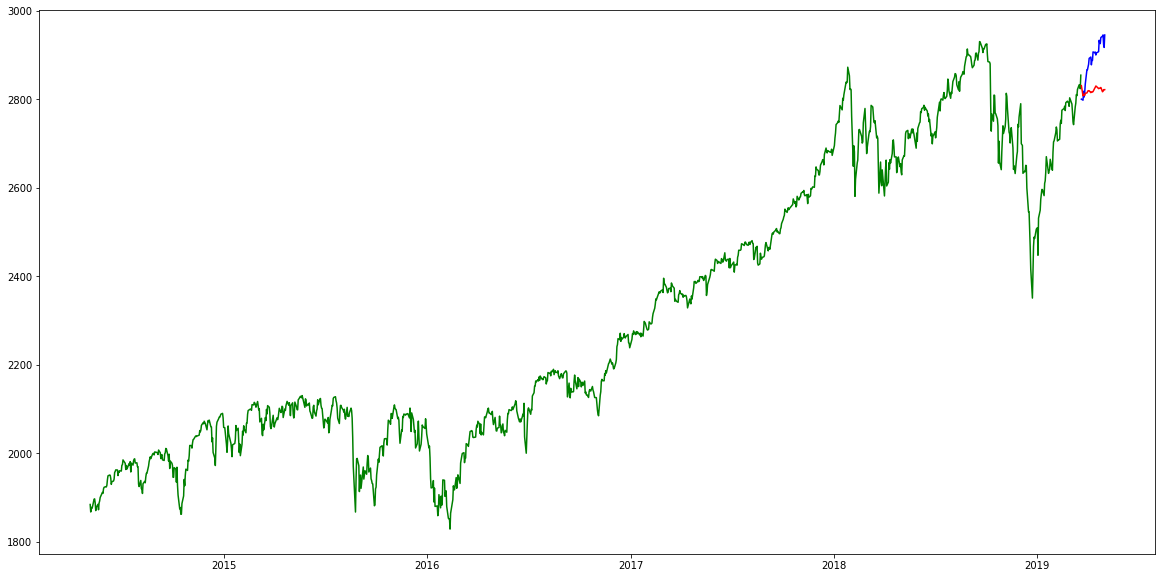

In [27]:
# Split df_xgb into train and test sets
test_size = 30
train_end = len(df_xgb) - test_size

df_xgb_train = df_xgb[:train_end]
df_xgb_test = df_xgb[train_end:]

print(len(df_xgb_train))
print(len(df_xgb_test))

plt.figure(figsize=(20,10))
plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c= 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'blue')
plt.show()

# Now split train & test sets into X and y
X_train = df_xgb_train[['day', 'month', 'year', 'quarter', 
                       'dayofweek', 'dayofmonth', 'dayofyear', 'weekofyear']]
y_train = df_xgb_train['Adj Close']


X_test = df_xgb_test[['day', 'month', 'year', 'quarter', 
                       'dayofweek', 'dayofmonth', 'dayofyear', 'weekofyear']]
y_test = df_xgb_test['Adj Close']

# Create rolling average features in the training set, using data points from training only
X_train['roll_average_5'] = y_train.shift(1).rolling(5).mean()
X_train['roll_average_10'] = y_train.shift(1).rolling(10).mean()
X_train['roll_average_15'] = y_train.shift(1).rolling(15).mean()
X_train['roll_average_20'] = y_train.shift(1).rolling(20).mean()

X_train['roll_min_5'] = y_train.shift(1).rolling(5).min()
X_train['roll_min_10'] = y_train.shift(1).rolling(10).min()
X_train['roll_min_15'] = y_train.shift(1).rolling(15).min()
X_train['roll_min_20'] = y_train.shift(1).rolling(20).min()

X_train['roll_max_5'] = y_train.shift(1).rolling(5).max()
X_train['roll_max_10'] = y_train.shift(1).rolling(10).max()
X_train['roll_max_15'] = y_train.shift(1).rolling(15).max()
X_train['roll_max_20'] = y_train.shift(1).rolling(20).max()

X_train['roll_median_5'] = y_train.shift(1).rolling(5).median()
X_train['roll_median_10'] = y_train.shift(1).rolling(10).median()
X_train['roll_median_15'] = y_train.shift(1).rolling(15).median()
X_train['roll_median_20'] = y_train.shift(1).rolling(20).median()


# Create rolling average features in the test set, using last data points in the training set.
# No data from test set was used here.

ra_vals = [5, 10, 15, 20]

for k in ra_vals:
    # Create rolling mean
    list_mean = y_train[-k:].tolist()
    
    for i in range(len(X_test)):
        temp_mean = np.mean(list_mean[-k:])
        list_mean.append(temp_mean)

    list_mean_trim = [list_mean[i] for i in range(k,len(list_mean))]
    
    if k == 5:
        list_ave5 = list_mean_trim
    elif k == 10:
        list_ave10 = list_mean_trim
    elif k == 15:
        list_ave15 = list_mean_trim
    else:
        list_ave20 = list_mean_trim
    # =============================

    # Create rolling median
    list_median = y_train[-k:].tolist()
    
    for i in range(len(X_test)):
        temp_median = np.median(list_median[-k:])
        list_median.append(temp_median)

    list_median_trim = [list_median[i] for i in range(k,len(list_median))]
    
    if k == 5:
        list_med5 = list_median_trim
    elif k == 10:
        list_med10 = list_median_trim
    elif k == 15:
        list_med15 = list_median_trim
    else:
        list_med20 = list_median_trim
    # =============================
    
        
    # Create rolling min
    list_min = y_train[-k:].tolist()
    
    for i in range(len(X_test)):
        temp_min = np.min(list_min[-k:])
        list_min.append(temp_min)

    list_min_trim = [list_min[i] for i in range(k,len(list_min))]
    
    if k == 5:
        list_min5 = list_min_trim
    elif k == 10:
        list_min10 = list_min_trim
    elif k == 15:
        list_min15 = list_min_trim
    else:
        list_min20 = list_min_trim
    # =============================
    

    # Create rolling max
    list_max = y_train[-k:].tolist()
    
    for i in range(len(X_test)):
        temp_max = np.max(list_max[-k:])
        list_max.append(temp_max)

    list_max_trim = [list_max[i] for i in range(k,len(list_max))]
    
    if k == 5:
        list_max5 = list_max_trim
    elif k == 10:
        list_max10 = list_max_trim
    elif k == 15:
        list_max15 = list_max_trim
    else:
        list_max20 = list_max_trim
    # =============================

      
X_test['roll_average_5']=[list_ave5[i] for i in range(len(X_test))]
X_test['roll_average_10']=[list_ave10[i] for i in range(len(X_test))]
X_test['roll_average_15']=[list_ave15[i] for i in range(len(X_test))]
X_test['roll_average_20']=[list_ave20[i] for i in range(len(X_test))]

    
X_test['roll_min_5']=[list_min5[i] for i in range(len(X_test))]
X_test['roll_min_10']=[list_min10[i] for i in range(len(X_test))]
X_test['roll_min_15']=[list_min15[i] for i in range(len(X_test))]
X_test['roll_min_20']=[list_min20[i] for i in range(len(X_test))]

X_test['roll_max_5']=[list_max5[i] for i in range(len(X_test))]
X_test['roll_max_10']=[list_max10[i] for i in range(len(X_test))]
X_test['roll_max_15']=[list_max15[i] for i in range(len(X_test))]
X_test['roll_max_20']=[list_max20[i] for i in range(len(X_test))]

X_test['roll_median_5']=[list_med5[i] for i in range(len(X_test))]
X_test['roll_median_10']=[list_med10[i] for i in range(len(X_test))]
X_test['roll_median_15']=[list_med15[i] for i in range(len(X_test))]
X_test['roll_median_20']=[list_med20[i] for i in range(len(X_test))]

# Now add mean price on different frequency to training and test set to create more features.
# Again, using data from training set only!
daily_mean_enc = df_xgb_train.groupby('day')['Adj Close'].mean().reset_index()
daily_mean_enc.columns = ['day','daily_mean']

weekly_mean_enc = df_xgb_train.groupby('weekofyear')['Adj Close'].mean().reset_index()
weekly_mean_enc.columns = ['weekofyear','weekly_mean']

monthly_mean_enc = df_xgb_train.groupby('month')['Adj Close'].mean().reset_index()
monthly_mean_enc.columns = ['month','monthly_mean']

yearly_mean_enc = df_xgb_train.groupby('year')['Adj Close'].mean().reset_index()
yearly_mean_enc.columns = ['year','yearly_mean']

# Join the encodes to X_train
X_train = pd.merge(X_train,daily_mean_enc,how='left',on=['day'])
X_train = pd.merge(X_train,weekly_mean_enc,how='left',on=['weekofyear'])
X_train = pd.merge(X_train,monthly_mean_enc,how='left',on=['month'])
X_train = pd.merge(X_train,yearly_mean_enc,how='left',on=['year'])


# Join the encodes to X_test
X_test = pd.merge(X_test,daily_mean_enc,how='left',on=['day'])
X_test = pd.merge(X_test,weekly_mean_enc,how='left',on=['weekofyear'])
X_test = pd.merge(X_test,monthly_mean_enc,how='left',on=['month'])
X_test = pd.merge(X_test,yearly_mean_enc,how='left',on=['year'])


# Create XGBRegressor
reg = xgb.XGBRegressor(n_estimators=1000, subsample=0.8, colsample_bytree=0.5, colsample_bylevel=0.5, colsample_bynode=0.5)

X_train_xgb = X_train.drop(columns=['day'])
X_test_xgb = X_test.drop(columns=['day'])

# Fit model to training data
reg.fit(X_train_xgb, y_train,
        eval_set=[(X_train_xgb, y_train), (X_test_xgb, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

# Predict target variables in train & test set
df_xgb_train['Predicted Price'] = reg.predict(X_train_xgb)
df_xgb_test['Predicted Price'] = reg.predict(X_test_xgb)


# Performance error
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('')
print('=== Train Error ===')
print(mean_absolute_percentage_error(y_true=df_xgb_train['Adj Close'],
                   y_pred=df_xgb_train['Predicted Price']))
print('')
print('=== Test Error ===')
print(mean_absolute_percentage_error(y_true=df_xgb_test['Adj Close'],
                   y_pred=df_xgb_test['Predicted Price']))


plt.figure(figsize=(20,10))

plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c = 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c = 'blue')
plt.plot(df_xgb_test['Date'], df_xgb_test['Predicted Price'], c = 'red')
plt.show()

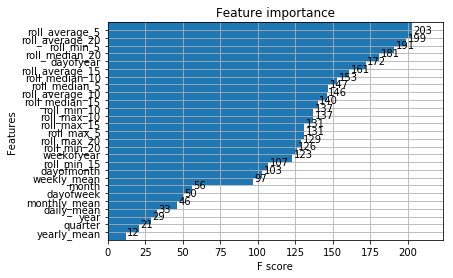

In [22]:
_ = plot_importance(reg, height=2)

In [23]:
df_xgb_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,Predicted Price
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014,0,2,125,5,19,1878.637939
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014,1,2,126,6,19,1878.223755
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014,2,2,127,7,19,1877.247681
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014,3,2,128,8,19,1876.025024
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014,4,2,129,9,19,1877.302368


In [26]:
#def create_features(df, label=None):
#    """
#    Creates time series features from datetime index
#    """
#    df['dayofweek'] = df['Date'].dt.dayofweek
#    df['quarter'] = df['Date'].dt.quarter
#    df['month'] = df['Date'].dt.month
#    df['year'] = df['Date'].dt.year
#    df['dayofyear'] = df['Date'].dt.dayofyear
#    df['dayofmonth'] = df['Date'].dt.day
#    df['weekofyear'] = df['Date'].dt.weekofyear
    
#    X = df[['dayofweek','quarter','month','year',
#           'dayofyear','dayofmonth','weekofyear']]
#    if label:
#        y = df[label]
#        return X, y
#    return X

#### Split into X and y

In [25]:
#X_train = df_xgb_train[['day', 'month', 'year', 'quarter', 
#                       'dayofweek', 'dayofmonth', 'dayofyear', 'weekofyear']]
#y_train = df_xgb_train['Adj Close']


#X_test = df_xgb_test[['day', 'month', 'year', 'quarter', 
                   #    'dayofweek', 'dayofmonth', 'dayofyear', 'weekofyear']]
#y_test = df_xgb_test['Adj Close']


#X_train, y_train = create_features(df_xgb_train, label='Adj Close')
#X_test, y_test = create_features(df_xgb_test, label='Adj Close')


In [26]:
#X_train.head(10)

#### Create rolling average features in the training set, using data points from training only

#### Create rolling average features in the test set, using last data points in the training set. No data from test set was used here.

#### Now add mean price on different frequency to training and test set to create more features. Again, using data from training set only!

In [36]:
#daily_mean_dict = daily_mean.set_index('day').T.to_dict('list')
#daily_mean_dict

In [37]:
#X_train['mean price'] = [daily_mean_dict[df_xgb_train['day'][i]][0]for i in range(len(X_train))]
#X_test['mean price'] = [daily_mean_dict[df_xgb_test['day'][i]][0]for i in range(1229,1259)]
#X_test.tail()

#### Create XGBoost Model

In [38]:
#x_train = X_train.dropna(how="any")
#y_train = 

We need to create more features for better performance.

In [43]:
len(df_xgb)

1259

#### Below is craft

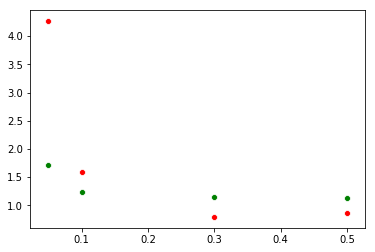

In [44]:
# 10 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[1], train_err[4], train_err[7], train_err[10]]
test_err_plot = [test_err[1], test_err[4], test_err[7], test_err[10]]

sns.scatterplot(x = changepoint_prior_scales, y = train_err_plot, color = 'green')
sns.scatterplot(x = changepoint_prior_scales, y = test_err_plot, color = 'red')

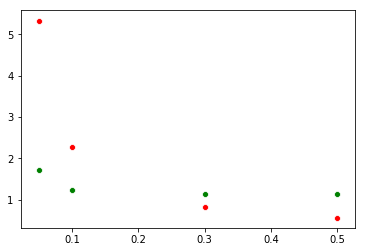

In [45]:
# 20 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[13], train_err[16], train_err[19], train_err[22]]
test_err_plot = [test_err[13], test_err[16], test_err[19], test_err[22]]

sns.scatterplot(x = changepoint_prior_scales, y = train_err_plot, color = 'green')
sns.scatterplot(x = changepoint_prior_scales, y = test_err_plot, color = 'red')

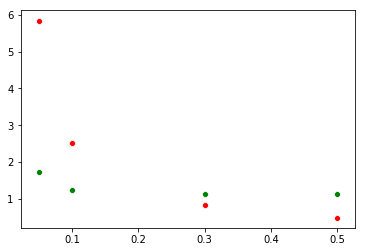

In [46]:
# 30 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[25], train_err[28], train_err[31], train_err[34]]
test_err_plot = [test_err[25], test_err[28], test_err[31], test_err[34]]

sns.scatterplot(x = changepoint_prior_scales, y = train_err_plot, color = 'green')
sns.scatterplot(x = changepoint_prior_scales, y = test_err_plot, color = 'red')

30 0.25 0.05 15 0.50335528681186 1.6626941083421842
30 0.25 0.05 10 0.6450221648220847 1.7166020241382762
30 0.25 0.05 5 0.8243204856240439 1.8570704301202936
30 0.25 0.5 15 0.4613162740522768 4.176346849579574
30 0.25 0.5 10 0.49722541032399936 4.539118267623182
30 0.25 0.5 5 0.5169412132289305 1.1595306773845386


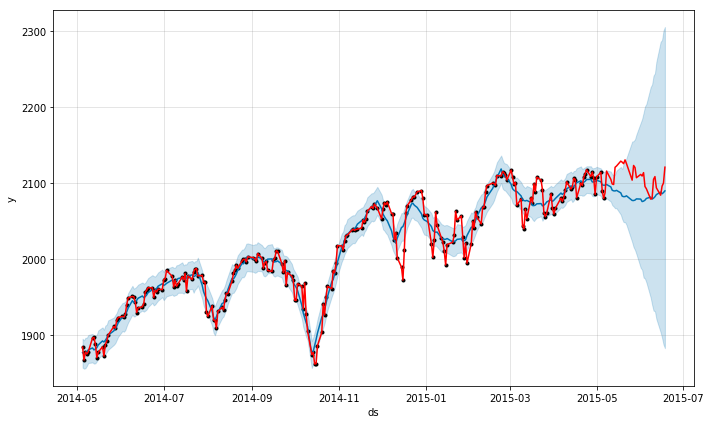

30 0.5 0.05 15 1.130512293036824 2.7153125662723654
30 0.5 0.05 10 1.2178850726122787 2.9336304329790273
30 0.5 0.05 5 1.2575008335057827 2.8845072044761224
30 0.5 0.5 15 0.7890806806281798 2.721720674863188
30 0.5 0.5 10 0.8774301413907134 0.8556309981373569
30 0.5 0.5 5 0.9424322641917442 1.8982109698058964


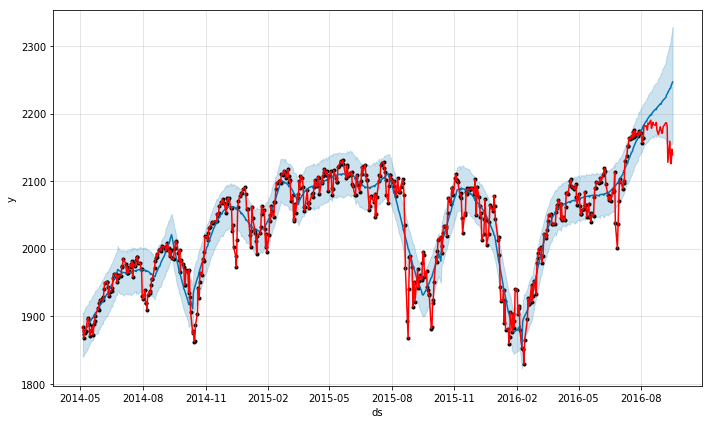

30 0.75 0.05 15 1.0112609759068718 1.13841330617717
30 0.75 0.05 10 1.0727316131425206 1.160701490639264
30 0.75 0.05 5 1.1410485225133724 1.0478328238780341
30 0.75 0.5 15 0.754325972558083 0.9054579116413402
30 0.75 0.5 10 0.7867079920981624 0.9321830442764956
30 0.75 0.5 5 0.8191186288397995 0.9361337047463365


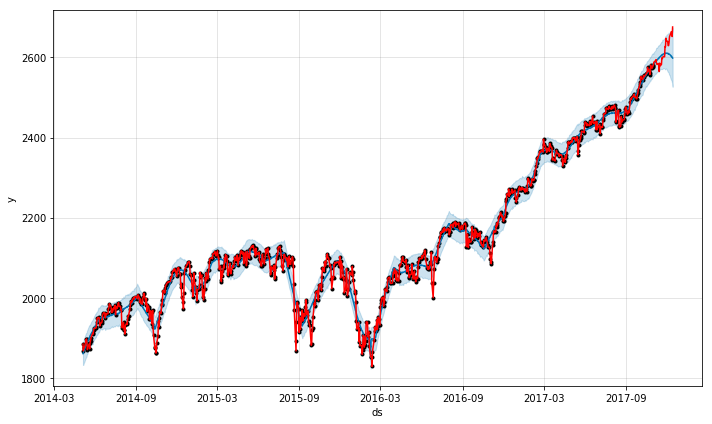

30 1.0 0.05 15 1.5275435615546622 5.560600262284806
30 1.0 0.05 10 1.543639781645612 5.549977236065829
30 1.0 0.05 5 1.6005338593831497 4.732149506042169
30 1.0 0.5 15 1.153875253401313 6.257373313121779
30 1.0 0.5 10 1.165849902679239 6.016028319804931
30 1.0 0.5 5 1.181191555959097 5.964529210368733


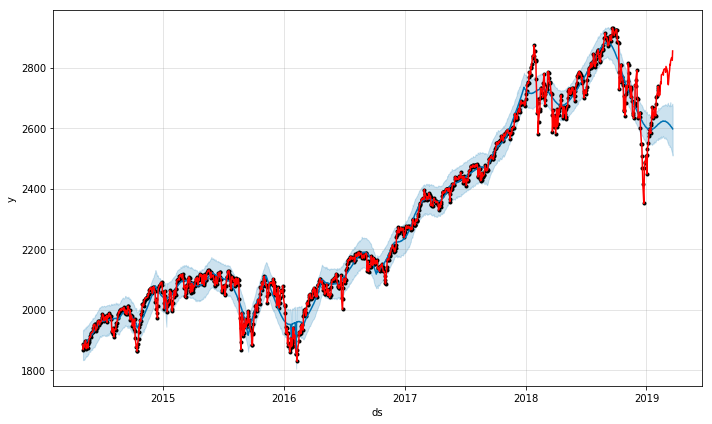

In [47]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

#prophet_df = df.copy()
prophet_df = df[['Date', 'Adj Close']]

# Rename to ds and y
prophet_df.columns = ['ds', 'y']


# Create holidays & special events
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

# Changepoints hyperparameters
changepoint_prior_scales = [0.05, 0.5] # default value is 0.05
changepoint_ranges = [0.7, 0.75, 0.8, 0.85, 0.9]

# Seasonality parameters
yearly_seasonality_range = [15, 10, 5] # default value is 10
seasonality_prior_scales = [0.01, 0.05, 0.1, 0.3, 0.5]

# Holidays & Events
holiday_prior_scales = [0.05, 0.5] # default is 0.05

# Prediction Size
H = [30]#, 45, 60]
Hmax = 60

# Initiate min error
min_mape = 100.0

# End points of training set
div_ratio = [0.25, 0.5, 0.75, 1.0]

for prediction_size in H:
    for div_point in div_ratio:
        div = np.int(len(prophet_df)*div_point) #+ 1
        train_prophet = prophet_df[:(div - Hmax)]    # -prediction_size]
        train_end = len(train_prophet)
        test_end = train_end + prediction_size

        if test_end > len(prophet_df):
            print('test set out of boundary')
        
        for i in changepoint_prior_scales:  # this was found to be VERY IMPORTANT! It helps predict the trend!
#for j in changepoint_ranges: changepoint_range=j,
            for k in yearly_seasonality_range:  # this is IMPORTANT!
#for l in seasonality_prior_scales: # this is negligible
#for m in holiday_prior_scales: # this is negligible
                p = Prophet(changepoint_prior_scale=i, yearly_seasonality = k, holidays = holidays)
                p.add_country_holidays(country_name='US')
                p.fit(train_prophet)
                future = p.make_future_dataframe(periods = prediction_size)
                future['ds'] = prophet_df['ds'][:len(future)] # do this to fix the 'ds' column in future dataframe
                        
                forecast = p.predict(future) # The predict method will assign each row in future a predicted value which it names yhat.

                train_error = 100*np.abs(forecast['yhat'][:train_end] - prophet_df['y'][:train_end])/prophet_df['y'][:train_end]
#                test_error = 100*np.abs(forecast['yhat'][-train_end:] - prophet_df['y'][-train_end:])/prophet_df['y'][-train_end:]
                test_error = 100*np.abs(forecast['yhat'][train_end:test_end] - prophet_df['y'][train_end:test_end])/prophet_df['y'][train_end:test_end]


                train_mape = train_error.mean()
                test_mape = test_error.mean()
        
#                print('H =', prediction_size, '; changepoint_prior_scale = ', i, 'holiday prior scale =', m, '; train error = ', train_mape, '; test error = ', test_mape)
                print(prediction_size, div_point, i, k, train_mape, test_mape)
        p.plot(forecast)
        plt.plot(prophet_df['ds'][:len(forecast)], prophet_df['y'][:len(forecast)], c='red')
        plt.show()

        
#                        if mape < min_mape:
#                            min_mape = mape
#                            min_i = i
#                            min_j = j
#                            min_k = k
#                            min_l = l
#                            min_m = m
                            
#print('Minimum value of Mean absolute percentage error (%) = ', min_mape)
#print(min_i, min_j, min_k, min_l, min_m)



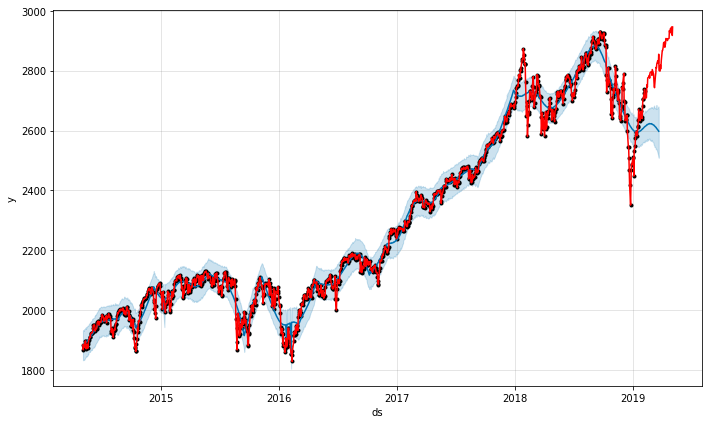

In [48]:
p.plot(forecast)
plt.plot(prophet_df['ds'], prophet_df['y'], c='red')
plt.show()

In [49]:
len(prophet_df)/250

5.036

In [50]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [51]:
#prophet_df = df.copy()
prophet_df = df[['Date', 'Adj Close']]

# Rename to ds and y
prophet_df.columns = ['ds', 'y']

prophet_df.tail(31)

,ds,y
1228,2019-03-21,2854.879883
1229,2019-03-22,2800.709961
1230,2019-03-25,2798.360107
1231,2019-03-26,2818.459961
1232,2019-03-27,2805.370117
1233,2019-03-28,2815.439941
1234,2019-03-29,2834.399902
1235,2019-04-01,2867.189941
1236,2019-04-02,2867.239990
1237,2019-04-03,2873.399902


In [52]:
prediction_size = 30
train_prophet = prophet_df[:-prediction_size]
print(train_prophet.head())
print(train_prophet.tail())
print(len(prophet_df), len(train_prophet))

          ds            y
0 2014-05-05  1884.660034
1 2014-05-06  1867.719971
2 2014-05-07  1878.209961
3 2014-05-08  1875.630005
4 2014-05-09  1878.479980
             ds            y
1224 2019-03-15  2822.479980
1225 2019-03-18  2832.939941
1226 2019-03-19  2832.570068
1227 2019-03-20  2824.229980
1228 2019-03-21  2854.879883
1259 1229


In [53]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))
#holidays = pd.DataFrame()
#holidays.columns = ['holiday','ds']

In [54]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2014-01-12,0,1
1,playoff,2014-01-19,0,1
2,playoff,2014-02-02,0,1
3,playoff,2015-01-11,0,1
4,playoff,2016-01-17,0,1
5,playoff,2016-01-24,0,1
6,playoff,2016-02-07,0,1
0,superbowl,2016-02-07,0,1


In [55]:
m = Prophet()#(holidays=holidays)
#m.add_country_holidays(country_name='US')

m = Prophet() #(changepoint_range=0.9) # instantiating a new Prophet object. Linear model is used by default. I tried with Logistic model but it was not good.
m.fit(train_prophet)

future = m.make_future_dataframe(periods = prediction_size) # get a dataframe that extends into the future a specified number of days
print(future.head())
print(future.tail(10))

# found out that when future extends into the future to get space for future predicted values, it also includes weekend
# which is not wanted

          ds
0 2014-05-05
1 2014-05-06
2 2014-05-07
3 2014-05-08
4 2014-05-09
             ds
1249 2019-04-11
1250 2019-04-12
1251 2019-04-13
1252 2019-04-14
1253 2019-04-15
1254 2019-04-16
1255 2019-04-17
1256 2019-04-18
1257 2019-04-19
1258 2019-04-20


In [56]:
future['ds'] = prophet_df['ds'] # do this to fix the 'ds' column in future dataframe

In [57]:
future.tail(10) # recheck

,ds
1249,2019-04-22
1250,2019-04-23
1251,2019-04-24
1252,2019-04-25
1253,2019-04-26
1254,2019-04-29
1255,2019-04-30
1256,2019-05-01
1257,2019-05-02
1258,2019-05-03


In [58]:
forecast = m.predict(future) # The predict method will assign each row in future a predicted value which it names yhat.
forecast.tail(10) # The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

error = 100*np.abs(forecast['yhat'] - prophet_df['y'])/prophet_df['y']
print('Mean absolute percentage error (%) = ', error.mean())

Mean absolute percentage error (%) =  1.81126886577725


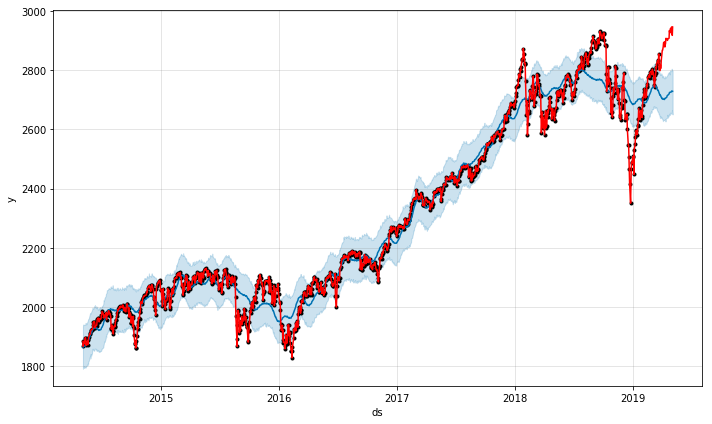

In [59]:
m.plot(forecast)
plt.plot(prophet_df['ds'], prophet_df['y'], c='red')
plt.show()

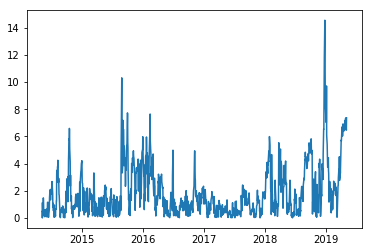

In [60]:
plt.plot(prophet_df['ds'], error)
plt.show()

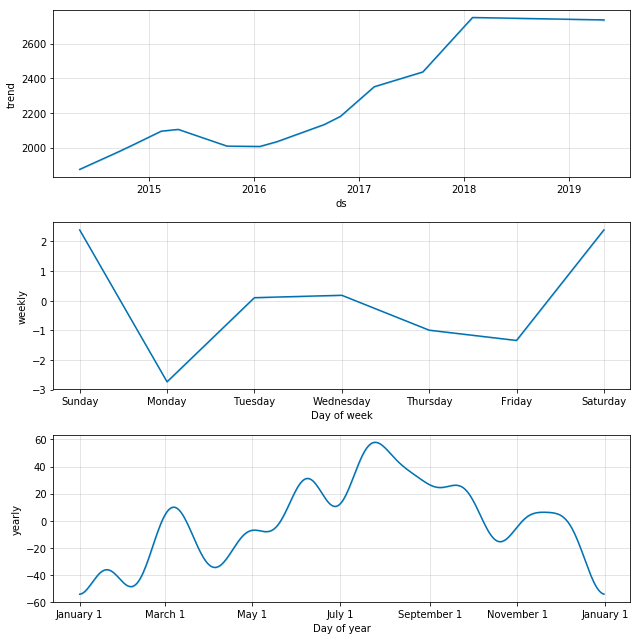

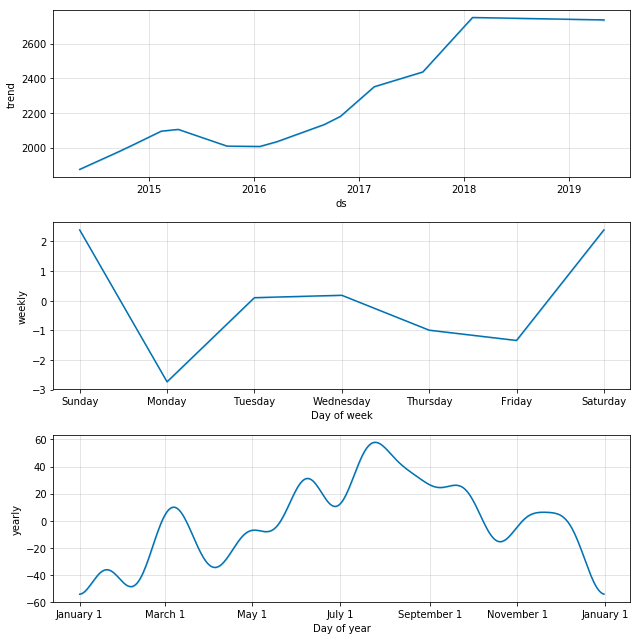

In [61]:
m.plot_components(forecast) # not clear about this part yet. Why are there Saturday and Sunday in the charts?

KeyError: 'playoff'

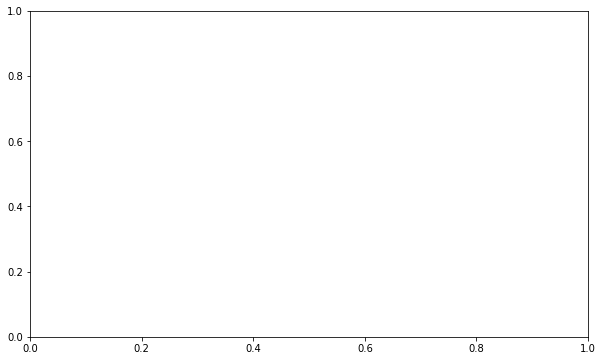

In [62]:
from fbprophet.plot import plot_forecast_component
plot_forecast_component(m, forecast, 'playoff')

In [ ]:
m.train_holiday_names

* Real time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. However, if you wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then there are several input arguments you can use.

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast) # a default value 80% for changepoints is used here

plt.plot(prophet_df['ds'], prophet_df['y'], c='red')
plt.show()

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.plot(prophet_df['ds'], prophet_df['y'])
plt.show()

In [ ]:
df1718 = df.loc[(df.year == 2017) | (df.year == 2018)]

In [ ]:
df1718.year.value_counts()

In [ ]:
def lin_reg_pred(df, target, offset, t, delta_t):

    """
    Given a dataframe, get prediction at timestep t using values from t-1, t-2, ..., 2, 1, 0.
    
    Inputs
        df: dataframe containing the values that we want to predict.
        target: the variable that we want to predict e.g. 'adj_close'
        offset: we only do prediction with training size >= offset.
    """

    # Check if t > offset
    
    if t > offset:
        
        # Create Linear Regression object
        lm = LinearRegression(fit_intercept = True)
    
        # Create training set
        X_train = np.array(range(t)).reshape(-1,1)
        Y_train = np.array(df['Adj Close'][:t]).reshape(-1,1)
        
        # Create test set
        X_test = np.array(range(t, t+delta_t)).reshape(-1,1)
        Y_test = np.array(df['Adj Close'][t: t+delta_t]).reshape(-1,1)
        
        # Fit Linear Regression on the training set
        lm.fit(X_train, Y_train)
    
        # Extract parameters
        a = lm.coef_
        b = lm.intercept_
        
        # Predictions
        Y_train_pred = lm.predict(X_train)
        Y_test_pred = lm.predict(X_test)

    
        training_err = r2_score(Y_train,Y_train_pred)
        test_err = r2_score(Y_test, Y_test_pred)
             
        return training_err, test_err #Y_test_pred #, Y_test_pred, Y_train_pred + Y_test_pred  

    else:
        return None
    
#    m = ols('Y_train ~ X_train',df).fit()
    

In [ ]:
lin_reg_pred(df1718, 'Adj Close', 251, 270, 30)

#### Plotting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Training 
#y_train_pred = lin_reg_pred(df1718, 'Adj Close', 251, 300, 5)

#sns.pointplot(x = [j for j in range(len(y_train_pred))], y = np.array(df1718['Adj Close'][:len(y_train_pred)]).reshape(300,))
#sns.pointplot(x = [j for j in range(len(y_train_pred))], y = np.array(y_train_pred).reshape(300,))

# Test
y_test_pred = lin_reg_pred(df1718, 'Adj Close', 251, 300, 5)

sns.pointplot(x = [j for j in range(len(df1718))], y = np.array(df1718['Adj Close']).reshape(len(df1718),))
#sns.pointplot(x = [j for j in range(len(y_test_pred))], y = np.array(y_train_pred).reshape(300,))




#df1718['Linear_Reg'] = y_train_pred
#df1718.head()

In [ ]:
h = np.array(y_train_pred).reshape(300,)
h.shape

In [ ]:
(np.array(range(15))).shape

In [ ]:
np.array(df['Adj Close'][:15]).shape

In [ ]:
sub_df = df[['Open','High','Low','Close','Adj Close']]#.head(100)
plt.figure(figsize=(10,5))
sns.heatmap(sub_df.corr(),annot=True,fmt="f")

In [ ]:
x = df['Volume']
y = df['Adj Close']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

#ax.set_xlim([0, max(x)])
ax.set_xlabel('Volume', fontsize=12)
ax.set_ylabel('Adjusted Close Price', fontsize=12)
ax.set_title('Scatterplot of Adjusted Close Price vs. Volume', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [ ]:
# Let's compare December with January
plt.figure(figsize=(10,10))
N = 3

dec_mean = df[df.month==12]['Adj Close'].mean()
dec_median = df[df.month==12]['Adj Close'].median()
dec_std = df[df.month==12]['Adj Close'].std()
december = (dec_mean,dec_median,dec_std)

jan_mean = df[df.month==1]['Adj Close'].mean()
jan_median = df[df.month==1]['Adj Close'].median()
jan_std = df[df.month==1]['Adj Close'].std()
january = (jan_mean,jan_median,jan_std)

ind = np.arange(N) # the x location for the groups
width = 0.5

dec = plt.bar(ind,december,width)
jan = plt.bar(ind+0.5,january,width)#,bottom=december)

plt.ylabel('Scores')
plt.title('December vs. January')
plt.xticks(ind,('Mean','Median','Standard Deviation'))

plt.legend((dec[0],jan[0]),('December','January'))

plt.show()